# Regularization

Welcome to the second assignment of this week. Deep Learning models have so much flexibility and capacity that **overfitting can be a serious problem**, if the training dataset is not big enough. Sure it does well on the training set, but the learned network **doesn't generalize to new examples** that it has never seen!

**You will learn to:** Use regularization in your deep learning models.

Let's first import the packages you are going to use.

### <font color='darkblue'> Updates to Assignment <font>

#### If you were working on a previous version
* The current notebook filename is version "2a". 
* You can find your work in the file directory as version "2".
* To see the file directory, click on the Coursera logo at the top left of the notebook.

#### List of Updates
* Clarified explanation of 'keep_prob' in the text description.
* Fixed a comment so that keep_prob and 1-keep_prob add up to 100%
* Updated print statements and 'expected output' for easier visual comparisons.

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io
from testCases import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

**Problem Statement**: You have just been hired as an AI expert by the French Football Corporation. They would like you to recommend positions where France's goal keeper should kick the ball so that the French team's players can then hit it with their head. 

<img src="images/field_kiank.png" style="width:600px;height:350px;">
<caption><center> <u> **Figure 1** </u>: **Football field**<br> The goal keeper kicks the ball in the air, the players of each team are fighting to hit the ball with their head </center></caption>


They give you the following 2D dataset from France's past 10 games.

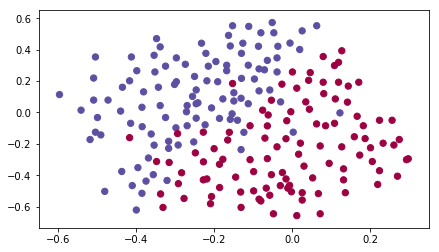

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Each dot corresponds to a position on the football field where a football player has hit the ball with his/her head after the French goal keeper has shot the ball from the left side of the football field.
- If the dot is blue, it means the French player managed to hit the ball with his/her head
- If the dot is red, it means the other team's player hit the ball with their head

**Your goal**: Use a deep learning model to find the positions on the field where the goalkeeper should kick the ball.

**Analysis of the dataset**: This dataset is a little noisy, but it looks like a diagonal line separating the upper left half (blue) from the lower right half (red) would work well. 

You will first try a non-regularized model. Then you'll learn how to regularize it and decide which model you will choose to solve the French Football Corporation's problem. 

## 1 - Non-regularized model

You will use the following neural network (already implemented for you below). This model can be used:
- in *regularization mode* -- by setting the `lambd` input to a non-zero value. We use "`lambd`" instead of "`lambda`" because "`lambda`" is a reserved keyword in Python. 
- in *dropout mode* -- by setting the `keep_prob` to a value less than one

You will first try the model without any regularization. Then, you will implement:
- *L2 regularization* -- functions: "`compute_cost_with_regularization()`" and "`backward_propagation_with_regularization()`"
- *Dropout* -- functions: "`forward_propagation_with_dropout()`" and "`backward_propagation_with_dropout()`"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarize yourself with the model.

In [3]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.
    
    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """
        
    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
            
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Let's train the model without any regularization, and observe the accuracy on the train/test sets.

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.16329987525724213
Cost after iteration 20000: 0.13851642423253263


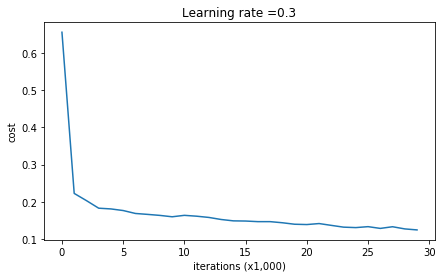

On the training set:
Accuracy: 0.947867298578
On the test set:
Accuracy: 0.915


In [4]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The train accuracy is 94.8% while the test accuracy is 91.5%. This is the **baseline model** (you will observe the impact of regularization on this model). Run the following code to plot the decision boundary of your model.

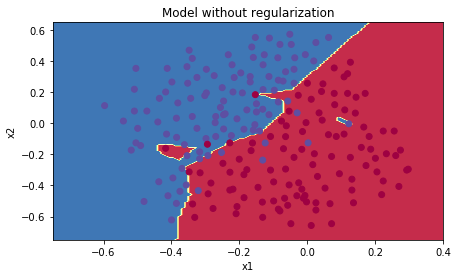

In [5]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

The non-regularized model is obviously overfitting the training set. It is fitting the noisy points! Lets now look at two techniques to reduce overfitting.

## 2 - L2 Regularization

The standard way to avoid overfitting is called **L2 regularization**. It consists of appropriately modifying your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences.

**Exercise**: Implement `compute_cost_with_regularization()` which computes the cost given by formula (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that you have to do this for $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, then sum the three terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [38]:
# GRADED FUNCTION: compute_cost_with_regularization

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    ### START CODE HERE ### (approx. 1 line)
    a=np.sum(np.square(W1))
    b=np.sum(np.square(W2))
    c=np.sum(np.square(W3))
    L2_regularization_cost = (a+b+c)*(lambd/(2*m))
    ### END CODER HERE ###
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [40]:
A3, Y_assess, parameters = compute_cost_with_regularization_test_case()

print("cost = " + str(compute_cost_with_regularization(A3, Y_assess, parameters, lambd = 0.1)))

10.4889815722 6.79736149226 1.11209097567
cost = 1.78648594516


**Expected Output**: 

<table> 
    <tr>
    <td>
    **cost**
    </td>
        <td>
    1.78648594516
    </td>
    
    </tr>

</table> 

Of course, because you changed the cost, you have to change backward propagation as well! All the gradients have to be computed with respect to this new cost. 

**Exercise**: Implement the changes needed in backward propagation to take into account regularization. The changes only concern dW1, dW2 and dW3. For each, you have to add the regularization term's gradient ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [41]:
# GRADED FUNCTION: backward_propagation_with_regularization

def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implements the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    
    ### START CODE HERE ### (approx. 1 line)
    dW3 = 1./m * np.dot(dZ3, A2.T) + ((lambd/m)*W3)
    ### END CODE HERE ###
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW2 = 1./m * np.dot(dZ2, A1.T) + ((lambd/m)*W2)
    ### END CODE HERE ###
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    ### START CODE HERE ### (approx. 1 line)
    dW1 = 1./m * np.dot(dZ1, X.T) + ((lambd/m)*W1)
    ### END CODE HERE ###
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [42]:
X_assess, Y_assess, cache = backward_propagation_with_regularization_test_case()

grads = backward_propagation_with_regularization(X_assess, Y_assess, cache, lambd = 0.7)
print ("dW1 = \n"+ str(grads["dW1"]))
print ("dW2 = \n"+ str(grads["dW2"]))
print ("dW3 = \n"+ str(grads["dW3"]))

dW1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = 
[[-1.77691347 -0.11832879 -0.09397446]]


**Expected Output**:

```
dW1 = 
[[-0.25604646  0.12298827 -0.28297129]
 [-0.17706303  0.34536094 -0.4410571 ]]
dW2 = 
[[ 0.79276486  0.85133918]
 [-0.0957219  -0.01720463]
 [-0.13100772 -0.03750433]]
dW3 = 
[[-1.77691347 -0.11832879 -0.09397446]]
```

Let's now run the model with L2 regularization $(\lambda = 0.7)$. The `model()` function will call: 
- `compute_cost_with_regularization` instead of `compute_cost`
- `backward_propagation_with_regularization` instead of `backward_propagation`

20.6771167049 3.6517078406 0.814657053369
Cost after iteration 0: 0.6974484493131264
20.6562402295 3.66542001048 0.83336694864
20.6368908654 3.68192816435 0.855293252993
20.6190827556 3.70132699286 0.880413790415
20.6025824271 3.723545752 0.908837715102
20.587501728 3.74866178011 0.940658016189
20.5736357695 3.77668374345 0.976001414303
20.5614713568 3.80780142748 1.01499742248
20.5507712879 3.84171848614 1.05753149218
20.5411851156 3.87787814108 1.10347375301
20.5330367991 3.91629053946 1.15268059593
20.5264634922 3.95695992091 1.20504914516
20.5221155817 4.00049340031 1.26032931238
20.5192736283 4.04610601871 1.31837395901
20.5176839024 4.09400210496 1.37911238058
20.5157732472 4.14276249073 1.44239487788
20.5158468012 4.19430335247 1.50855922185
20.51697011 4.24765236465 1.57735814124
20.5198050443 4.30337543645 1.64878408952
20.5259542418 4.36191318992 1.72257040386
20.5335135528 4.42242836477 1.79850277472
20.5425154139 4.48500741555 1.87640183226
20.5551380731 4.54884134995 1.955

13.5416969147 7.97179446062 7.32003447474
13.5285979583 7.97097708605 7.32102841247
13.5161938248 7.96999277657 7.32193921129
13.503404453 7.96914728845 7.32291680922
13.4906821657 7.96820600495 7.32384874073
13.4775012051 7.96734137877 7.32481354961
13.4650271746 7.96624540154 7.32565913555
13.4522394901 7.96546920155 7.32665096453
13.439840018 7.96449392913 7.32753560877
13.4274066403 7.96368628798 7.32849433987
13.4147096411 7.96283079343 7.32943215817
13.4025111165 7.96189177272 7.33031983255
13.3898180625 7.96112676273 7.33129219263
13.3776297581 7.96016633977 7.33216508418
13.3651739879 7.95937951947 7.33311918532
13.352969257 7.95848906682 7.33402221024
13.3404641871 7.95766527964 7.33495556616
13.3283303112 7.95675715022 7.33584246331
13.3157866479 7.95594568144 7.33677420716
13.3038369102 7.95502476006 7.33764697634
13.29127455 7.95426811319 7.33860072756
13.2795313607 7.95331478753 7.33945371764
13.2670453396 7.95257630201 7.34041202079
13.2551226355 7.95162970133 7.341265764

10.5635357508 7.77194002041 7.54682336156
10.5577127117 7.77138303299 7.54727072208
10.5505072314 7.77122300806 7.54792410115
10.544787218 7.77056109862 7.54831214393
10.5380162443 7.77042056251 7.54896312467
10.5321253295 7.76986555368 7.54940808919
10.5255583947 7.76968484811 7.5500306538
10.5198858949 7.76916028162 7.55048829061
10.5132999988 7.7690296883 7.55113657835
10.5076435398 7.76848451247 7.55157920731
10.5006305495 7.76835855594 7.55222693816
10.4948736091 7.76770383952 7.55261503802
10.4884300939 7.76756637771 7.55324577327
10.482693629 7.76706142828 7.55370382841
10.4762796745 7.76685598521 7.55430490824
10.470424816 7.76636932617 7.5547706646
10.4641479775 7.76615848935 7.55536754964
10.4583395547 7.76571950866 7.55585704986
10.4517305759 7.76544790973 7.55642427656
10.44590295 7.76493660602 7.55686957045
10.4396352167 7.76473286482 7.55746049454
10.4339747254 7.76424200239 7.55791384297
10.4275956244 7.76404029668 7.558505656
10.4217684929 7.76360032486 7.55898539141
10

9.01845739868 7.68643374633 7.69250042803
9.01398444162 7.68656753823 7.69299846982
9.01175505544 7.68598749254 7.69313736839
9.0079669889 7.68622731993 7.69367591263
9.00548383467 7.68579367726 7.69389085357
9.0013741996 7.68592343888 7.69437450531
8.99916066622 7.68536645048 7.69451610181
8.9954266694 7.68565154305 7.69507204631
8.99278094548 7.68510574518 7.69522807855
8.98882082559 7.68530575726 7.69574450367
8.98622523947 7.68479826373 7.69591504841
8.98266978847 7.68490308639 7.6963790188
8.98032487547 7.68449617547 7.69659208848
8.97671383735 7.68466803357 7.69709431507
8.97411063643 7.6842317984 7.69730147474
8.97008303574 7.68438022024 7.69778619983
8.96777846388 7.68389736314 7.69796102746
8.96426684195 7.68404843882 7.69844702493
8.96180213217 7.68362358409 7.69865176045
8.95779859312 7.68378924106 7.69913974996
8.95527472249 7.68329169554 7.69930514552
8.95183219115 7.68340831803 7.69976652599
8.94956876081 7.68301825965 7.69998236097
8.94593549663 7.68320877034 7.700481054

8.25110913097 7.6507110296 7.78007711173
8.25165829463 7.64938649312 7.77966698032
8.24776177943 7.65056977036 7.78046441423
8.24853978972 7.64923472917 7.78004524068
8.24457529406 7.65036050166 7.78081001695
8.24559240754 7.64913045615 7.78043741456
8.24094772547 7.6503103824 7.78123499172
8.24232482302 7.64887781788 7.78075889084
8.23815167047 7.65021689984 7.78162330771
8.2394398899 7.64879465887 7.78115955774
8.23477734987 7.65012671282 7.78202673898
8.23599127168 7.64857359991 7.78149406222
8.23220624126 7.64997258997 7.78238210943
8.23304717053 7.6485850613 7.78194076414
8.22856352372 7.64977156299 7.78273597217
8.22996380755 7.64837005286 7.78227284796
8.2256090171 7.64971754569 7.78314004185
8.22654573338 7.64828222665 7.78266885775
8.22263029407 7.64950961157 7.78347770219
8.223581447 7.64814298055 7.78303412074
8.21948914755 7.64937705576 7.78384567567
8.22068449839 7.64807172464 7.78343617029
8.21596332689 7.6493124064 7.78425710172
8.2170807772 7.64783254376 7.78375523339
8

7.87049436109 7.63724432502 7.82917424486
7.87299720805 7.63552242831 7.82848519722
7.86867654377 7.63727568578 7.82946117088
7.87129301631 7.63541906307 7.82869999395
7.86702224449 7.63720262968 7.82968015998
7.86950787772 7.63545767338 7.82897658346
7.86542467354 7.63719898338 7.8299437704
7.86803043692 7.63536753885 7.82919360616
7.86438251342 7.63715643889 7.83017748041
7.86690726532 7.63544438991 7.82949438551
7.86266273841 7.6371703139 7.83045734699
7.86526623288 7.63535040212 7.8297136605
7.86088359083 7.63713209279 7.83069409647
7.86370142875 7.63535346783 7.82997155848
7.85932607423 7.6372066027 7.83099257464
7.86222802971 7.63523885806 7.83017442173
7.85788689406 7.63713561418 7.83120489945
7.86082946076 7.63513944615 7.83036571966
7.85618635935 7.63712170417 7.83143290569
7.85904756951 7.63515646421 7.8306149196
7.85452061046 7.63705179798 7.8316446523
7.85743627753 7.63505396348 7.83080371385
7.85347195964 7.63704014967 7.83187283375
7.85633284276 7.63511428108 7.8310779939

7.73553950513 7.62983106185 7.82513202055
7.74809086754 7.62313842214 7.82181497829
7.73585658552 7.62979127158 7.82490471605
7.74773634754 7.62307833848 7.82157991163
7.73543342904 7.62962854258 7.82462700622
7.74745811937 7.6229941147 7.82134339511
7.73549047922 7.62947287394 7.82435783417
7.74741370096 7.6229128205 7.8211133033
7.73546755316 7.62938242409 7.82412631498
7.74772762319 7.62283908445 7.82089341304
7.73519509455 7.62935082561 7.82392822737
7.74702479434 7.62274693744 7.82066172056
7.73481733257 7.62921691119 7.82367691758
7.74657098078 7.62266262334 7.82043796891
7.73476386381 7.62903994964 7.82341235871
7.74645343737 7.62258148193 7.82022399383
7.73436307646 7.62894157328 7.82319299989
7.74647709057 7.62248727306 7.82000935334
7.73452857556 7.62891334365 7.8230109003
7.74615385233 7.62242538041 7.81981294775
7.7342978764 7.62880173914 7.82279638421
7.74641006585 7.62236820374 7.81963094185
7.73395332245 7.62879653684 7.82264127269
7.7455159169 7.62229533433 7.8194390405

7.71737419973 7.63142527779 7.81768202806
7.72907763486 7.62534485675 7.81476289236
7.7176988993 7.63155887209 7.81776231366
7.72888423138 7.62543002888 7.81481797727
7.71756583935 7.63160041263 7.81779941153
7.72922137122 7.62550940037 7.81487606371
7.7178300094 7.63173877725 7.81788623415
7.72912322238 7.62560566887 7.81494264756
7.71782190894 7.63175205736 7.81791332686
7.72946646445 7.62567899976 7.81499868011
7.71713427396 7.63193614039 7.81802197197
7.7285651866 7.62572395909 7.81503174356
7.71685005733 7.63193452053 7.8180262763
7.72841568326 7.62577255997 7.81505971244
7.71699412004 7.63205483411 7.8180798809
7.72837513008 7.62587191604 7.81510639899
7.71703908601 7.63205608139 7.81809035181
7.72875671607 7.6259459741 7.81515439903
7.71729769691 7.63224915572 7.81818769164
7.72864127062 7.62605453976 7.81521105798
7.7172533156 7.63226065854 7.81821020387
7.72909445123 7.62613688897 7.81527076041
7.71759445574 7.63246636899 7.81831696225
7.72894127576 7.6262508274 7.81533032655


7.73943019312 7.65063290552 7.8238917022
7.75288972895 7.6437140158 7.82050489692
7.73997283282 7.65081748435 7.82390257793
7.75296791646 7.64385900877 7.82049494587
7.74018461424 7.65086208528 7.82384658311
7.75376433734 7.64398849386 7.82048342736
7.74079197778 7.65113763687 7.82390266023
7.75394886343 7.64414546719 7.82047885647
7.74075790327 7.65121669605 7.8238628364
7.75391276937 7.64426537159 7.82045706075
7.74104856558 7.65132500971 7.82383366321
7.75473277816 7.64439943332 7.82044308462
7.74173801031 7.65155280781 7.8238626857
7.7545990738 7.64454914893 7.8204315322
7.74178745912 7.65158962206 7.82380305225
7.75543147591 7.64468459938 7.82042457742
7.74246628815 7.65181724353 7.82383647201
7.75544391074 7.64483265293 7.8204165235
7.74264022853 7.65184948319 7.82377728865
7.75617665128 7.6449651301 7.82041061032
7.74320736249 7.65210107559 7.82382614755
7.75610059874 7.64511634108 7.82040749953
7.74334263475 7.6521160999 7.82376264585
7.75693915098 7.6452482234 7.82040536341
7.

7.80233887316 7.67151151388 7.83141280236
7.78913442706 7.67875664861 7.83490250081
7.80260958425 7.67171250202 7.83147443962
7.78948294507 7.67890151541 7.8349369575
7.80330133652 7.67190063863 7.83153033903
7.7900122839 7.67918741526 7.83503754875
7.80359395815 7.6721034384 7.8315878427
7.79031611766 7.67937475128 7.835087471
7.8037897696 7.67230172872 7.83164377929
7.79060860637 7.67952176183 7.8351204522
7.80444248526 7.67249213651 7.83169923368
7.79112151851 7.67983121529 7.83522130415
7.80474935178 7.67270773048 7.83175060782
7.79148990365 7.67997034313 7.83524527187
7.80494610438 7.67289730073 7.83180012311
7.79174394957 7.68010559292 7.83527029017
7.80556223475 7.67307800234 7.8318497886
7.79224849322 7.6804063897 7.8353669874
7.80587307856 7.67328771944 7.83189884024
7.79260413089 7.68058131549 7.83539845245
7.80610950509 7.67348759171 7.8319421472
7.79288328694 7.6807522198 7.83542803688
7.806755651 7.67368024055 7.83198285036
7.79340938093 7.68100709559 7.83549712509
7.80709

7.84946878886 7.69802773293 7.84285614624
7.83618403084 7.70526256642 7.84637340721
7.85005204611 7.69823397406 7.84299213745
7.83666480092 7.70553268358 7.84653911743
7.85034945848 7.69844919746 7.84312933078
7.83693595609 7.7057604461 7.84668095335
7.85094625276 7.698665504 7.84326502587
7.83746142268 7.70603565258 7.84684472873
7.85105431269 7.69889300414 7.84340427868
7.83769987771 7.70616705528 7.84693997688
7.85133793159 7.69910187724 7.84353963533
7.83796627796 7.70638802134 7.84708016212
7.85193072782 7.69931286731 7.84367480943
7.83846277062 7.70666008443 7.84724439183
7.85205806744 7.69953519023 7.84381409083
7.83864217583 7.7068498593 7.84736921495
7.85231632629 7.69975224319 7.84395318347
7.83896638767 7.70701774073 7.84748474172
7.85289507032 7.69995971134 7.84408922261
7.83945318885 7.70728955221 7.84765183534
7.8530141393 7.70017977892 7.84423017714
7.83964223395 7.70747624035 7.84777813657
7.85374504197 7.70039521309 7.84437143167
7.84021412915 7.70777865719 7.847958029

7.89857317932 7.73104897018 7.86580198175
7.88501908714 7.7384635007 7.86941657132
7.89866992365 7.73130903545 7.86598877844
7.88521129669 7.73864329804 7.86956603776
7.89942714639 7.731552834 7.86617207718
7.88580295317 7.73899449756 7.8697976227
7.89954883825 7.73181304452 7.86635591645
7.88597926119 7.73921727798 7.86996465451
7.9001472998 7.73206656977 7.86653925166
7.88648182608 7.73953081673 7.87017605463
7.90035548684 7.73232892596 7.86672455074
7.88679738714 7.73972469198 7.87032884243
7.90051309517 7.73257802065 7.86690493999
7.8869871904 7.73995013308 7.87049830675
7.90110237797 7.73282301124 7.86708493905
7.88747679517 7.7402583842 7.87070800936
7.90129207916 7.73307772324 7.86726743852
7.88777309921 7.7404474135 7.87085997819
7.90144425656 7.73332113868 7.86744685971
7.88795611017 7.74066817412 7.87102884324
7.90202800008 7.73355995267 7.86762559788
7.88844173891 7.74097370263 7.87123887975
7.90212060805 7.73380972064 7.86780707696
7.88861121478 7.74116902287 7.87139541159


7.96043961554 7.77257486861 7.89554099415
7.94642884852 7.78020762968 7.89924822307
7.96112492521 7.77284840804 7.89573415462
7.94694756595 7.78059191716 7.89949281828
7.96137427315 7.77314316934 7.89593301699
7.94732146981 7.78081553656 7.89966224169
7.96200675067 7.77343381086 7.89613979587
7.9478241908 7.7811750541 7.89989761114
7.9623660286 7.77372510696 7.89633726915
7.94823622904 7.78143566716 7.9000815801
7.96294563011 7.77401464732 7.8965370934
7.94874723481 7.78177196717 7.90030515773
7.96320215795 7.77433957633 7.8967452269
7.94911733965 7.7820141625 7.90047202786
7.96391917338 7.7746081315 7.89693342379
7.94965540265 7.78239182586 7.90071029399
7.96419437876 7.77490840659 7.89711953903
7.95003526426 7.78262580756 7.90086442489
7.9648784431 7.7752097395 7.89730931911
7.95059526459 7.78300693538 7.90109201968
7.96525075979 7.77552471324 7.89750313671
7.9510053127 7.78329136987 7.90126717535
7.96607832801 7.77582275396 7.89768200527
7.95169299103 7.78367241116 7.90148538816
7.9

8.02085429711 7.8299605586 7.93200681103
8.03648461049 7.82231804535 7.92834176956
8.02155502558 7.83036538934 7.9322457691
8.03676088313 7.8226416546 7.92853900084
8.02194118284 7.83060607552 7.93240095082
8.03759080551 7.82293129643 7.92871585685
8.02256561619 7.83102468778 7.93263768702
8.03774810307 7.82323577238 7.92889312545
8.02290758792 7.8312180916 7.93276572634
8.0387245913 7.82354063752 7.92908196639
8.02366498296 7.8316542044 7.93301035863
8.03890040435 7.82385491873 7.92925921516
8.02398139625 7.83187770401 7.93314769054
8.0397015807 7.82415814172 7.92944007133
8.02465961667 7.83225982361 7.93336657125
8.03995429091 7.82447722362 7.92962732718
8.02504343887 7.83248981915 7.93351100116
8.04082396355 7.82477584802 7.9298059362
8.02571513217 7.83291633509 7.93374946763
8.04104698613 7.82509928448 7.92999198688
8.02611706117 7.83312754851 7.93388537042
8.04189862157 7.82540744926 7.93017955447
8.02679649077 7.83353295481 7.93411502533
8.04205564894 7.82571381533 7.93035455506


8.08383460239 7.8765864509 7.96637733918
8.09873015938 7.86906869331 7.96279111417
8.08417891692 7.87685156077 7.9665932139
8.09950358501 7.86941089841 7.96304520339
8.08477935039 7.87731429287 7.96690317308
8.09968766468 7.86975848357 7.96329498529
8.08526667214 7.87758280988 7.96711820824
8.10069797903 7.87009222787 7.96354533486
8.08583434802 7.8780142957 7.96740899558
8.10070267878 7.87042668756 7.9637817209
8.08601195891 7.8782810189 7.96761418589
8.10147303616 7.8707464612 7.9640140792
8.08653342781 7.87869843593 7.96789111022
8.10166946473 7.87107475207 7.96424470056
8.08677298722 7.87898729719 7.96809861053
8.10241972389 7.87136755818 7.96444922332
8.08739708401 7.87941218919 7.96836064545
8.10261533812 7.87169291495 7.96465916613
8.08785238715 7.87964686927 7.96853104336
8.10352588645 7.87203814672 7.96489087618
8.08857871654 7.88009933783 7.96881064258
8.10386967831 7.87237177519 7.96510579439
8.08883965402 7.88035740999 7.96899058935
8.1045838085 7.87267276467 7.96530645651


8.16008026979 7.91668929629 8.00047741011
8.14537260573 7.92464154365 8.00437099955
8.16039239434 7.91702934674 8.00075859163
8.14551566335 7.92489077964 8.00460794514
8.16101050638 7.9173279567 8.00101799279
8.14613255442 7.92532249119 8.00492918816
8.16118476031 7.91767194339 8.00129663509
8.14643894214 7.92555485136 8.00516094243
8.1620099606 7.91798835782 8.00157358771
8.14697445691 7.92598488453 8.00548312669
8.16192582025 7.91830768675 8.00183340586
8.14731511635 7.92620069192 8.0056989508
8.16282066506 7.91862631054 8.00210614715
8.14769435871 7.92660494344 8.00601261321
8.16276870868 7.91893970591 8.00237243937
8.14807400036 7.92683410926 8.00624064431
8.16365131028 7.91927400484 8.00265648491
8.14867442701 7.92729958183 8.00657886551
8.16382801881 7.91958594136 8.00290949657
8.14883749347 7.92751614132 8.0067898952
8.16442511785 7.91990080302 8.00317432488
8.14964284792 7.92791691218 8.00709637053
8.16463912069 7.92023775338 8.00345017507
8.14964261463 7.92816411 8.00733278293

8.22633246954 7.96666717663 8.03969365921
8.21127423913 7.97466160442 8.04361707559
8.22643464872 7.96700614415 8.03997480442
8.21154442551 7.97488830339 8.04384183015
8.22707835891 7.96733710143 8.04025296274
8.21222145311 7.97529195579 8.04415675242
8.22728136551 7.96767886987 8.04053763161
8.2122657408 7.97557594047 8.04441671274
8.2278683135 7.96802008 8.04082891364
8.2129207591 7.97598996713 8.04473757161
8.22796516748 7.96836464167 8.04111115277
8.21313017782 7.9762111755 8.04496651869
8.22860738937 7.96870136053 8.04140330935
8.21366484052 7.9766235797 8.04529427976
8.22853134675 7.9690523797 8.04169971328
8.2138894555 7.97686936751 8.04554227642
8.22930574213 7.96937562959 8.04198749772
8.21427872083 7.97727693309 8.04586977282
8.22984633747 7.96971853056 8.04228211401
8.21490554783 7.97769413446 8.04619942922
8.22984513295 7.97008036381 8.042584799
8.21498468085 7.97795151774 8.04645516811
8.23056199449 7.97040517049 8.04287338192
8.21546783874 7.97836371744 8.04677712182
8.23

8.27013551385 8.02886787515 8.08795591483
8.28568863607 8.02128783477 8.08436339051
8.27065055823 8.02931068562 8.0882801717
8.28577423136 8.0216390233 8.08464120402
8.27101014775 8.02952614705 8.08849123133
8.28647411833 8.0219666178 8.08490756866
8.27142125963 8.02991514605 8.08878876766
8.28637547785 8.02230907876 8.08518308081
8.27157055908 8.0301862591 8.08903479225
8.28707232705 8.02264014764 8.08546169823
8.27207551444 8.03058700963 8.08934088178
8.28767888318 8.02296256653 8.08572370527
8.27275183064 8.03097900851 8.08963507705
8.2876386477 8.02332607 8.08600595513
8.27292996906 8.03120919317 8.08986104715
8.28845698155 8.02365586641 8.08628513118
8.27322851426 8.03160933709 8.0901651154
8.28885548815 8.02396992659 8.08653891471
8.27379791752 8.03199571519 8.09045313128
8.28871928222 8.02432323552 8.08681295424
8.27399014012 8.03221981509 8.09067334529
8.2894779579 8.02466890642 8.08710024529
8.27458819006 8.03262498762 8.09098804702
8.29022614266 8.02500934907 8.08737971695
8.

8.3218430061 8.07235901358 8.12423318946
8.33713288648 8.06455815168 8.12054568691
8.32204394944 8.07256304676 8.12445240766
8.33777530268 8.06484696654 8.12080545796
8.32257146451 8.07296557288 8.12476327474
8.33847808116 8.06516794321 8.12107579105
8.32319716537 8.07333621315 8.12505569171
8.338522359 8.06551254989 8.1213559414
8.32322640682 8.07353601165 8.12526957448
8.33898369607 8.0658090891 8.12161711891
8.3236516889 8.07394003886 8.12558112452
8.33957773679 8.06612672234 8.12188515775
8.3241477716 8.0743108136 8.12587440031
8.33953055941 8.0664633467 8.12216272404
8.32444632594 8.07451325566 8.12608869603
8.3402241913 8.06677893736 8.12243388994
8.32499475826 8.07492112565 8.12640411742
8.34094188522 8.06710760079 8.12270991797
8.32555233664 8.07529578539 8.12670036018
8.34078410908 8.06743380126 8.12298104285
8.32574017928 8.0754474627 8.12689032609
8.3414480137 8.067741336 8.12325090207
8.32625451389 8.07585132438 8.12720618966
8.34214008152 8.06806262461 8.12352564369
8.3266

8.38183330844 8.12332667495 8.16839517642
8.39753148526 8.11556349033 8.16474406213
8.38233402126 8.12368632291 8.16868732235
8.39743705585 8.11590241129 8.16502804542
8.3824389426 8.12389640243 8.16891409548
8.39805060729 8.11620628618 8.16530314024
8.38290672944 8.12428296615 8.16922243097
8.39860304213 8.11651864043 8.16557068205
8.38339839271 8.12464087738 8.16951324689
8.39850325466 8.11685549369 8.16585381757
8.38348006794 8.12485168673 8.16974102919
8.39906017894 8.11714877836 8.16612211118
8.38393293772 8.12523163466 8.1700471859
8.39962588049 8.11747118307 8.16639939969
8.38443942238 8.12559422157 8.17034351248
8.40023721312 8.11781182512 8.16668600484
8.38491758208 8.12601033508 8.17066345112
8.40015176759 8.11814215196 8.16695929839
8.38499093834 8.12619499651 8.17087159576
8.40071354481 8.11843603081 8.16722393707
8.38549769057 8.12654921124 8.17115636765
8.40129481162 8.11875218197 8.16748720335
8.3859454487 8.12694607004 8.17145711263
8.40188967585 8.11906445006 8.1677434

8.45165899688 8.16485514326 8.20636866819
8.43629022544 8.17307334206 8.2103322455
8.45223843154 8.16517475718 8.20661211822
8.43679512909 8.17344087933 8.21059614875
8.4520886359 8.16552727016 8.20687064579
8.43695352536 8.17360514686 8.21077113483
8.45265709046 8.16583283896 8.2071315415
8.43732953536 8.17401684753 8.21107741316
8.45318933093 8.16611668674 8.20736749428
8.43781098645 8.17434628881 8.21133491032
8.4537518502 8.16646296395 8.20762491051
8.43832407019 8.17471743264 8.21160355098
8.45367004024 8.16681200255 8.20788266134
8.43840602015 8.17495246034 8.21180719556
8.45418881108 8.16708338271 8.20811239077
8.43886319261 8.17527300941 8.21206045338
8.45473521514 8.16741856975 8.20836526686
8.43937523744 8.17563909266 8.2123280254
8.45532357249 8.16776068985 8.20861988379
8.43979888454 8.17607768902 8.21262670134
8.45592789026 8.16808905348 8.2088598425
8.44035092126 8.17644202762 8.21288125085
8.4557977534 8.16844708492 8.20911248429
8.44053003688 8.17659818798 8.21304342582

8.49432098772 8.22499922682 8.25305434574
8.50998539279 8.21726549155 8.24944001929
8.49470820573 8.22538415973 8.25336571738
8.5104174569 8.21758655459 8.24971598756
8.49513413858 8.22571478261 8.25364898861
8.51015967234 8.21791735034 8.25000189895
8.49516439061 8.22586367024 8.25385378044
8.51061945049 8.21821349944 8.25028289004
8.49555723076 8.22619506011 8.25414736509
8.51104883843 8.21851466448 8.25055889662
8.49586856749 8.22657210569 8.25446084549
8.51153205778 8.21881695176 8.25083560252
8.49625451841 8.22693458823 8.25476320185
8.51202782627 8.2191333342 8.25111411672
8.49670673468 8.22727136284 8.25504747636
8.51175597943 8.21945217457 8.25138695613
8.49669675995 8.22743425206 8.25525406183
8.51220566885 8.21974076104 8.25166030915
8.49710188045 8.22776342112 8.25554482361
8.51264251667 8.22005302661 8.2519419845
8.4974697952 8.22811912706 8.25584797401
8.51311987868 8.22036627623 8.25222413947
8.49782907006 8.22850403712 8.25616254051
8.51361468704 8.22068127727 8.25250252

8.54582527861 8.27270203732 8.29521222515
8.56114856067 8.2646965159 8.29147185988
8.54590329021 8.27278563184 8.295372366
8.5616012631 8.26498865761 8.29174113401
8.54623502906 8.27314070416 8.29566733208
8.56200461138 8.26526078645 8.29198981062
8.54662316384 8.27343291721 8.29592730581
8.56242592672 8.2655634689 8.29225883282
8.54701328121 8.27376459172 8.29621072501
8.56283995954 8.26586393854 8.29252532301
8.54743087205 8.27406734417 8.29647964638
8.56254149318 8.2661792628 8.2928025012
8.54738471995 8.27423070875 8.29669085511
8.56294813214 8.26646937888 8.29307994783
8.54776555705 8.27453530867 8.2969731903
8.56332100653 8.26676733518 8.29335847664
8.54813606997 8.27483852897 8.29725629707
8.56374630908 8.26707271053 8.29364467313
8.54852629877 8.27514796382 8.29754048347
8.56415580627 8.26736533278 8.29391734987
8.54879605956 8.2755283164 8.2978551622
8.56456762817 8.26765805409 8.29418814123
8.54918972001 8.27583579696 8.29813326068
8.56435054022 8.26797593964 8.29447469137
8.

8.59703745735 8.31992800693 8.33913843877
8.61273554566 8.3120749021 8.33549623325
8.59730528567 8.32026625811 8.33944182177
8.61315446438 8.31235232415 8.33576970787
8.59769623649 8.32055542763 8.33971588065
8.6135064004 8.31263990071 8.33604116969
8.59806110363 8.32083732332 8.33998659076
8.61385485753 8.31293159492 8.33631832197
8.59839556745 8.32115359571 8.34027855704
8.6143027165 8.31322637168 8.33659990987
8.59873125561 8.32149473083 8.34057498911
8.61467248436 8.31349975201 8.33685725212
8.59911298031 8.32176944051 8.34083429287
8.61430695448 8.31379968684 8.33713251911
8.59900625959 8.3219105629 8.3410414466
8.61472196116 8.31405290274 8.33739717903
8.59937258592 8.32218800418 8.34131038459
8.61503392494 8.31432383839 8.33766014866
8.59970036784 8.3224565219 8.34157602305
8.6153901309 8.31460561437 8.33793578108
8.60000221222 8.32276515843 8.34186422167
8.61580784357 8.31488006899 8.33820643418
8.60030760364 8.32309748913 8.34215666919
8.61615939721 8.31514052045 8.33845836126

8.64987378411 8.36692459561 8.3832957342
8.665484743 8.35905632294 8.37966003139
8.65006453723 8.36724095794 8.3835874274
8.66583028203 8.35931661572 8.37992330127
8.6503316685 8.36753090507 8.38385700869
8.66607792697 8.3595715207 8.3801714157
8.65060919354 8.36777716104 8.38410408512
8.66638887974 8.35984575406 8.38043606767
8.65085015734 8.3680954249 8.38439123964
8.66687046072 8.36011163242 8.38069738463
8.65125731929 8.36839347993 8.38466052185
8.66712285777 8.36037410086 8.38094443336
8.65155130773 8.36864011214 8.38490304244
8.6674614691 8.36065419854 8.38120710283
8.65181478621 8.36895657753 8.38518198127
8.66801553426 8.36091616216 8.38145728523
8.6522732486 8.36926801937 8.38544826975
8.66845475716 8.36117880059 8.38169485129
8.65269428928 8.36955823087 8.3857009574
8.66878870982 8.36146691217 8.38194974288
8.65297531869 8.36987668235 8.3859717139
8.66925579823 8.36174267865 8.38219891781
8.65339539548 8.37017156847 8.38622512434
8.66962604649 8.36201893637 8.38244030502
8.65

8.69620503418 8.41080042 8.42462246954
8.71194637909 8.40282754668 8.42094686732
8.69646187399 8.41104662035 8.4248651863
8.71223082282 8.40309679678 8.42119904527
8.69668565441 8.41134899137 8.42513312341
8.71251723439 8.40334894926 8.42144064733
8.69695322882 8.41162073763 8.42538504741
8.71299656508 8.40362050332 8.42169501495
8.69741752562 8.41189349731 8.42563521194
8.71334752406 8.40389117759 8.42194117446
8.69776552473 8.41217596929 8.42588809253
8.71363800915 8.40416793959 8.42219185396
8.69802828334 8.41248397431 8.4261580206
8.71396208426 8.40444102541 8.42244526498
8.69832231909 8.41276633389 8.42641602425
8.71427289664 8.40472757657 8.42270873146
8.69866054475 8.41302296254 8.42665985955
8.71459487286 8.40500313342 8.42295759019
8.69893684449 8.41332781123 8.42692604635
8.71484456288 8.40527126901 8.42320721231
8.69920213552 8.41360707232 8.42718229387
8.71519303818 8.40555880908 8.42346872078
8.69960090322 8.41385977569 8.42742665076
8.71539083395 8.40584859957 8.423731333

8.75686968571 8.44593584285 8.46069085749
8.74117047136 8.45425699624 8.46464422755
8.75703845971 8.44621560362 8.46092361577
8.74133126016 8.45455206488 8.46488540254
8.75738767657 8.44647720622 8.46114561804
8.74167472235 8.45481727289 8.46510902563
8.75761934288 8.44675128866 8.46137503601
8.74195612009 8.45504289226 8.46531125941
8.75787843093 8.44701448616 8.46159341221
8.74218337521 8.45532509114 8.46554153602
8.75810827613 8.44726462994 8.4618086655
8.74241936943 8.45557843672 8.46575918671
8.7584530017 8.44753059228 8.46203478052
8.74278380203 8.45582545471 8.46597150608
8.75894244059 8.44779168969 8.46225062952
8.74315596285 8.45615711099 8.4662211934
8.7591736585 8.44804428258 8.46246113882
8.74339012655 8.45641130829 8.46643267847
8.75949749439 8.4483099228 8.46267984111
8.74376380773 8.45663782078 8.46663096542
8.75962524316 8.44857384455 8.46289551548
8.7439996332 8.4568516374 8.46683029168
8.75991243806 8.44884779859 8.46312924576
8.74423335459 8.45714539011 8.46707320854

8.7786119752 8.49104756689 8.49793573761
8.79433552419 8.48309115458 8.49426600295
8.77877836859 8.49133205715 8.49818813527
8.79458007049 8.48335219624 8.49450672888
8.77908929592 8.49155110382 8.49840759668
8.79477287719 8.48362614619 8.49475370366
8.77931846608 8.4918022395 8.49864693709
8.79504950155 8.48388983564 8.49500043352
8.77962476128 8.49203110206 8.49887185049
8.79538491658 8.48414265005 8.49523362338
8.77985867894 8.49235381641 8.49913934315
8.79566544907 8.48438977382 8.49546409113
8.78013697549 8.49260630463 8.49937464083
8.79582850071 8.48465668621 8.4957101294
8.78036581229 8.49282525262 8.49959515834
8.79605227687 8.48491796994 8.49594921168
8.78054166476 8.49310337269 8.49984264699
8.79629939448 8.48515671398 8.49617657461
8.78078600366 8.49335070921 8.50007584717
8.79643725383 8.48541561226 8.49641873709
8.78099014165 8.49356404049 8.50029358726
8.79672541042 8.48567001267 8.4966546226
8.78120408384 8.49386133019 8.50054914781
8.79716762295 8.48590544893 8.49687762

8.82805704453 8.51824536279 8.52696252264
8.81261627159 8.52640457948 8.53082958424
8.82829204331 8.51849869088 8.52718729528
8.8128079625 8.52667780509 8.53106510804
8.82842069856 8.51873237314 8.52740294492
8.81295370488 8.52691208151 8.53128347946
8.82871598067 8.51898742291 8.5276353559
8.81328367285 8.52714532039 8.53150126711
8.82910558713 8.51923957732 8.52785850408
8.81355365532 8.52746446126 8.53175398398
8.8293520442 8.51947314008 8.52806694092
8.81380725808 8.52770113597 8.53196740898
8.82952993165 8.51973056602 8.52829520259
8.81405678466 8.52790790944 8.53216967183
8.82967533615 8.51998495891 8.52851949323
8.81417592733 8.52817499841 8.53240140851
8.8299010779 8.52021863035 8.52873408727
8.81443117398 8.52841160416 8.53261962175
8.83018369167 8.52047349196 8.52896273624
8.81475033776 8.52863743164 8.53283640686
8.83050299636 8.5207411958 8.52920439778
8.81506535875 8.52889904281 8.53306844137
8.83067752802 8.52098761406 8.52942239213
8.81521222535 8.52916494652 8.533301480

8.84269324059 8.55888163221 8.56138081766
8.8583955574 8.55089809629 8.55770752523
8.8429129552 8.5590924087 8.56158514804
8.85854179519 8.55113171394 8.55792806341
8.84318273028 8.55926799708 8.56178157409
8.8585915736 8.55137817221 8.55816051991
8.84334963696 8.55944813213 8.56198851935
8.85874538015 8.55162562584 8.55840374701
8.8434047867 8.55974918698 8.5622571883
8.85926025483 8.55184175967 8.55862881612
8.84382924397 8.56001549353 8.56249780393
8.85944574198 8.55208992445 8.55886003176
8.84408939674 8.56020655461 8.56270219393
8.85964197724 8.55232443595 8.55908466442
8.84418257232 8.56050189066 8.56295864682
8.85977161097 8.55253782012 8.55930165474
8.84439595099 8.5606866471 8.5631609578
8.85993952781 8.55278703349 8.55953600915
8.84462427684 8.56086868032 8.56336046654
8.86015587006 8.55301021598 8.55975354854
8.84471853981 8.56117499964 8.56361856042
8.86054207497 8.55321258505 8.55995899726
8.84511791446 8.5613884156 8.56382897016
8.86077096096 8.55346264192 8.56019153509
8

8.89106121511 8.58567797617 8.5919636364
8.87576631357 8.59376265058 8.595781554
8.89142756655 8.58589319606 8.59218021519
8.87599100729 8.59407896433 8.59604629548
8.8916909775 8.58610505962 8.59239385164
8.87622995996 8.59429256531 8.59625563164
8.89180340002 8.5863152823 8.59259863955
8.87643465497 8.59445026478 8.59643915926
8.89194000905 8.58653976659 8.59281835257
8.8765447995 8.59469282655 8.59667199307
8.8922607481 8.5867513694 8.59303799407
8.87680800716 8.59493057558 8.59689566866
8.89260778521 8.58695897622 8.59324151895
8.87716202032 8.59514375119 8.5971017665
8.8926242937 8.58718503015 8.59345552356
8.87732839472 8.59530453108 8.59729447815
8.89269568762 8.58742430638 8.59369112348
8.87738382391 8.59555201416 8.59753685446
8.89290559763 8.58764459681 8.59392065848
8.87758915055 8.59576844542 8.59776097106
8.8931918221 8.58786742948 8.59414623662
8.87787967365 8.59596013921 8.59796499189
8.89351619448 8.58807680337 8.59435536137
8.87810170688 8.59624753847 8.59821289748
8.8

8.90802350023 8.62838259861 8.63015641102
8.92350836296 8.62043305113 8.62651901236
8.90827340539 8.62852982696 8.63033833551
8.92362517843 8.62066986681 8.62674941576
8.90836052918 8.62877261142 8.63057050472
8.92384392631 8.62087322917 8.62695905507
8.90853581398 8.62896798608 8.63076736095
8.92420440631 8.6210611773 8.62714781515
8.90889219768 8.62918779614 8.63097346034
8.92429413921 8.62128247945 8.62735796107
8.90896769016 8.62941929666 8.63119386863
8.92453837459 8.62150861874 8.62756889365
8.90921007583 8.62962928447 8.63138986838
8.92465003327 8.62170561438 8.62776274908
8.90940454942 8.62976975049 8.63155947337
8.92482536239 8.62191157469 8.62796710861
8.90951774203 8.630020165 8.63178829058
8.9252332599 8.62212616479 8.62817093486
8.90988267656 8.63025800617 8.63199397159
8.92535426686 8.62233275593 8.62836585957
8.91003602011 8.63044174305 8.63218244453
8.9254022421 8.62254869133 8.62856282111
8.91004802945 8.63068688151 8.63239592354
8.92570144972 8.62276529525 8.628764689

8.93905111824 8.66151944 8.66042684966
8.9544992059 8.65366487424 8.6568302287
8.93933858442 8.66171576649 8.66060632864
8.95462721068 8.65389086013 8.65702863286
8.9394226581 8.66195203175 8.66081079275
8.95479600481 8.65408886571 8.65721411686
8.93960819306 8.66212855268 8.66098066951
8.95482417561 8.65428024921 8.65738747399
8.93976294783 8.66225492008 8.66113125473
8.95521222503 8.65449681469 8.65758859892
8.93998656221 8.6625770685 8.66137839066
8.9554111974 8.65469537241 8.65777201471
8.94016702204 8.66277325147 8.66155511217
8.95545790011 8.65489204094 8.6579457403
8.94032954941 8.66291152944 8.66170923159
8.9555566301 8.65511565997 8.65814855935
8.94041843992 8.6631505457 8.66192013397
8.95595437507 8.65531324324 8.65833524499
8.94072010234 8.66342252033 8.66213797712
8.95604858909 8.65553387046 8.6585277825
8.94093570969 8.66357310425 8.66230342212
8.95621448561 8.65577244516 8.65874114995
8.94115109161 8.66373371574 8.66247252825
8.95625316717 8.65596767419 8.65892051222
8.94

8.96759405489 8.69441717347 8.6915527233
8.98306511584 8.68654342161 8.68795567168
8.96789149153 8.6945954892 8.69172368696
8.98311013808 8.68674560105 8.68814031989
8.96802276795 8.69476838998 8.69190330708
8.98325337871 8.68695028461 8.68833865309
8.96825064293 8.69492971755 8.69208476965
8.98357737569 8.6871722332 8.68855247607
8.96845352447 8.69521907513 8.6923260059
8.98377516964 8.68736416242 8.68874171025
8.96861078092 8.69539611396 8.69249963409
8.98378906691 8.68754115401 8.68891141489
8.9687631594 8.69550219666 8.69264495963
8.98395621358 8.68774577498 8.68911232515
8.96885173978 8.6957516729 8.69286653129
8.98432707245 8.68792524581 8.68929773451
8.96911779891 8.6959897986 8.6930691999
8.98436092637 8.68810508919 8.6894659243
8.96928744163 8.6961062856 8.69321669184
8.98441946299 8.68831566569 8.68966639118
8.96932963766 8.69632680889 8.69342645665
8.98466964241 8.68850762041 8.6898637687
8.96956003658 8.69651847642 8.69361451519
8.98493673758 8.68868833244 8.69003972186
8.9

8.99392762275 8.72392265106 8.7209142217
9.00933839725 8.71604252461 8.71732133001
8.99420704229 8.72409228441 8.72108767211
9.00944413704 8.71625411561 8.71752106414
8.99441704728 8.72422273376 8.72124862922
9.00953708018 8.71644480256 8.71770889579
8.99440081532 8.72448411552 8.72146459632
9.00968030028 8.71660188271 8.71787118101
8.99465666413 8.7245992582 8.72161540717
9.00990391316 8.71680988742 8.71807118592
8.9949407274 8.72478106612 8.72180715195
9.01010408333 8.71702458706 8.71828145656
8.99503477249 8.72499927219 8.72200713966
9.01023413959 8.71716702479 8.71843420113
8.99515131057 8.72516671164 8.72217527418
9.01045545927 8.71734324411 8.71861222021
8.9954235355 8.72534107636 8.72235752236
9.01060948514 8.71755424397 8.71881700658
8.99552671639 8.72557024351 8.7225601991
9.01070361337 8.71772109018 8.71898148912
8.99565274951 8.72570926782 8.72271148568
9.01080081971 8.71789700369 8.71915276671
8.99582403612 8.7258424166 8.72287382537
9.0111371602 8.71809426098 8.71935202196

9.03390927251 8.74354650788 8.74361494599
9.01889726551 8.7515056137 8.74732276959
9.03400088053 8.74368984324 8.74376073692
9.01906580651 8.75162267728 8.74746218388
9.03420906231 8.74388111171 8.74394365771
9.01924329846 8.75184868702 8.7476667043
9.03441334759 8.74407713961 8.74413743373
9.01935002651 8.75207007068 8.74786006739
9.03441468645 8.7442253894 8.74428421799
9.01947297485 8.75216091729 8.74798727152
9.03449380592 8.74441788511 8.74446873821
9.01960644323 8.75235097537 8.7481768769
9.03475675849 8.74461120563 8.74466098499
9.01991169014 8.75252125216 8.74835559425
9.0349255683 8.74481120288 8.74485236488
9.0199004728 8.75277465065 8.74856222308
9.035036464 8.74493671724 8.74498863904
9.02008976791 8.75287664626 8.74869172605
9.03525780742 8.74512535286 8.74516799342
9.02034933489 8.75305023836 8.74886653053
9.03541004146 8.7453184035 8.74535373203
9.02035062448 8.75330676985 8.74907523655
9.03553382135 8.74544996442 8.74549345382
9.02055117462 8.75342313976 8.7492115365
9.

9.05602510253 8.76845683113 8.76834647739
9.0410377658 8.77641627391 8.77204759341
9.05610804679 8.76859291377 8.76848909447
9.04120460048 8.77652248438 8.77218273277
9.05635057193 8.7687786355 8.76867061339
9.04140319709 8.7767398093 8.77237969445
9.05650122801 8.76895452336 8.76884735101
9.04147675095 8.77693924929 8.77256025193
9.05647922336 8.76909640901 8.76899314082
9.04163241005 8.77699901726 8.77267646928
9.05655153343 8.76928367259 8.76917881505
9.04172884216 8.77717957867 8.77286448781
9.05694904329 8.76946461797 8.76936941387
9.04193991178 8.77743800766 8.77307354065
9.05694243907 8.76959591971 8.76950393137
9.04205827324 8.77750973355 8.7731890016
9.05701039535 8.76977498287 8.769680469
9.04214952551 8.77768630842 8.77337167418
9.05741194491 8.76995496579 8.76986945178
9.04235871938 8.77795816973 8.77358645707
9.05741524374 8.77008950165 8.77000399117
9.04249244538 8.77803011117 8.77370067234
9.05749137386 8.77027269202 8.77018141663
9.04263095648 8.77820740056 8.7738827316

9.07501014259 8.78972704631 8.79002358757
9.06003787192 8.7976982569 8.79372621589
9.07507971679 8.789868951 8.79017291788
9.06023770132 8.79778333782 8.79385656986
9.07538900218 8.79005844316 8.79036190122
9.06047306565 8.79800354419 8.79405214186
9.07545389042 8.79021239324 8.79051761011
9.06051021827 8.79816973498 8.79421561922
9.07553618251 8.79035710087 8.7906720873
9.06071710072 8.79828147256 8.79436085107
9.07575467462 8.79055212242 8.7908615783
9.06092033436 8.79849346102 8.7945609893
9.07597220481 8.79074020031 8.79105149589
9.06100894025 8.79869160619 8.79473900888
9.07602492585 8.79086067299 8.79117955969
9.06119112533 8.79875658036 8.7948495366
9.07620818409 8.79103198422 8.79135074736
9.06136316102 8.79896094123 8.79504254792
9.07635746928 8.79121047477 8.79153441532
9.0614514393 8.79914853843 8.79522199798
9.0764809614 8.79134759771 8.79168133178
9.06163069666 8.7992485598 8.79535133659
9.07665812109 8.79151256617 8.79184498225
9.06178466955 8.79944576271 8.79553663706
9.

9.09423432345 8.81075113083 8.80959128314
9.07934362863 8.81870205618 8.81327163358
9.09433405739 8.81091214966 8.80973266121
9.0795659797 8.81877303938 8.81336664616
9.09437130224 8.8110780957 8.80987053059
9.07965153624 8.81893171399 8.81351030805
9.09460316327 8.81124818644 8.81002406013
9.07978228287 8.81917825005 8.81370122495
9.09473116246 8.81142447973 8.81018380385
9.07999129482 8.8192842161 8.81382054241
9.09482662887 8.81159976098 8.810330754
9.08008643785 8.81944647632 8.81396321693
9.09504677928 8.81175551699 8.81047136799
9.08018369256 8.81969585844 8.81415014888
9.09516298461 8.81192363041 8.81062266673
9.08038355299 8.81979662437 8.81426398471
9.09525188881 8.81209636451 8.81076710743
9.0804884732 8.81995949924 8.81440688559
9.09541487126 8.81225518522 8.81090902784
9.08076028538 8.82010002789 8.81454753594
9.09543142209 8.812455498 8.81108256217
9.08076600362 8.82030067511 8.81472628244
9.09572227879 8.81262986944 8.81124988461
9.08094166913 8.82048472269 8.81487791463


9.10170968159 8.84448773576 8.83638904153
9.11653773356 8.83672478442 8.83286631327
9.10185053975 8.84455509084 8.83648669254
9.11656860494 8.83689536674 8.83301829436
9.1019570543 8.84471630848 8.83664324521
9.1167491247 8.83707219428 8.83318479589
9.10218023211 8.84485815335 8.836796992
9.11690840341 8.83727081518 8.83337282831
9.10223893124 8.84507292135 8.83697939862
9.11697358287 8.83739335969 8.83349701272
9.10230092715 8.84521799246 8.8371192677
9.11713381243 8.83755538201 8.83365202199
9.10255722629 8.84537130915 8.8372767013
9.11731532926 8.83775955137 8.83383732447
9.10261501998 8.84557131636 8.8374434998
9.11736108167 8.8378700686 8.83394679432
9.1027013672 8.84567912858 8.83755867219
9.11756393337 8.83801950809 8.83408986069
9.10282015964 8.84590971373 8.83774322584
9.11770070554 8.83818208348 8.83424436521
9.10299008415 8.84602759515 8.83786813719
9.11800317017 8.83832629695 8.83437451712
9.10330359933 8.846168763 8.83799676396
9.11798323271 8.83849114045 8.83451734217
9.1

9.1237310617 8.86971309651 8.8596617826
9.13851991787 8.86194821973 8.85613377839
9.12389840397 8.86977276666 8.85975278511
9.13878150872 8.8621395318 8.85629401455
9.12421742247 8.8699458121 8.85990872382
9.1389560087 8.86234187036 8.85646746561
9.12434761445 8.87009288984 8.86004143219
9.1390060597 8.86246076281 8.85657361854
9.12434838441 8.87025815453 8.86017672474
9.13918028075 8.86259276295 8.85669970375
9.12458486783 8.87039271025 8.86030975494
9.139272401 8.862785835 8.85686761837
9.12469639819 8.8705399677 8.86044960858
9.13939620362 8.86292576081 8.85699513577
9.12471379901 8.87073039502 8.86059823122
9.1395493629 8.86304851319 8.85711029205
9.12495641253 8.87083034703 8.86070998853
9.13962542373 8.86323148108 8.85727154382
9.12504661138 8.87097532115 8.86084844802
9.1399633295 8.86336625566 8.85739724747
9.1252165919 8.87122428223 8.86102406862
9.13993364674 8.86350039612 8.85751694101
9.12537507906 8.87128793623 8.86112167611
9.13999180148 8.86369261843 8.8576830981
9.12547

9.14578632498 8.89467655692 8.88326925297
9.16038126724 8.88716544975 8.87987637533
9.14585224041 8.89492283716 8.88347303732
9.16057643264 8.88732437083 8.8800412731
9.14598716182 8.89506234257 8.88360991533
9.16078753133 8.88744097688 8.88015338861
9.14623382733 8.89519210607 8.88373626441
9.16074401464 8.88760919693 8.88030759676
9.14618715639 8.89536832619 8.88390530567
9.16100780817 8.88776766447 8.8804744855
9.14640857921 8.89551844565 8.88405001901
9.16118299332 8.88789052579 8.88059167838
9.14649667212 8.89571777626 8.88420908409
9.16112675414 8.88803119057 8.88072903955
9.14668524353 8.89575726054 8.88431135172
9.16137090966 8.8882276295 8.88091326186
9.14684319063 8.89592499113 8.88446320749
9.16153473661 8.88833471021 8.88102038569
9.14688852049 8.89612801267 8.88462065912
9.16147385383 8.88846330069 8.88114903401
9.14700212724 8.89618171284 8.88472504258
9.1618695815 8.88864763167 8.88132464363
9.14728630215 8.89641514484 8.884910518
9.16190497984 8.88878488003 8.8814522503

9.18167266362 8.91189206116 8.90438881777
9.16714875194 8.91957657127 8.90793181869
9.18192065811 8.91196437078 8.90447588391
9.16739875118 8.9196914989 8.90804333557
9.1818032086 8.9121291287 8.90462200206
9.16749829664 8.9197496489 8.90815613066
9.18202626869 8.91231826226 8.90480739684
9.16750285916 8.92003291215 8.90837048908
9.18224369277 8.9124163393 8.90491668373
9.16778536715 8.92009638142 8.90846185288
9.18210915862 8.91256983679 8.90505652027
9.16784116419 8.92014826612 8.90857055746
9.18254218604 8.91274516269 8.90523505031
9.16794871572 8.9204999397 8.90881494029
9.18256316708 8.9128480158 8.90534591022
9.16808339353 8.92054150344 8.90889964753
9.1825214339 8.91300978487 8.90549410097
9.16824626571 8.92062815269 8.90902641167
9.18273729196 8.91319707886 8.90567439728
9.16826471584 8.92093830105 8.90926353392
9.18293417016 8.91334534966 8.90583160758
9.16852628558 8.92097007423 8.90934564921
9.18309539767 8.9134690197 8.90594624795
9.16873870846 8.92109518255 8.90947261287
9

9.19980364495 8.932755052 8.92527850176
9.18535009068 8.94045649826 8.928846102
9.19997622008 8.93291011507 8.92544412951
9.18551552609 8.94057160892 8.92897530921
9.19992532607 8.93302495323 8.92555894078
9.18560190618 8.94062925514 8.92907627249
9.20005206139 8.93318731032 8.92572133068
9.18567616167 8.94087606024 8.92928531427
9.20026166151 8.93335046944 8.92589100375
9.18579576452 8.94100443791 8.92941453028
9.20042470623 8.93345031809 8.925990364
9.18602857549 8.94110108324 8.92952297425
9.20037352077 8.93360787094 8.92613981508
9.18589314113 8.94132767316 8.92971470871
9.20057414166 8.93374180503 8.92629049406
9.18623259707 8.94138393102 8.92981580581
9.20075532894 8.93388865727 8.92642812333
9.1864269433 8.94149348289 8.92994145316
9.20068914645 8.93404097083 8.92657815153
9.18624760477 8.94172078694 8.93013603195
9.201170181 8.93416813708 8.92672991938
9.18673612186 8.94186479663 8.9302715153
9.2011326061 8.93430353511 8.92684629964
9.18664568921 8.94199930224 8.93040207654
9.2

9.20252402208 8.95945862243 8.94773697255
9.21699901796 8.95188203982 8.94431358211
9.20263887252 8.95956396713 8.94786232419
9.21728822907 8.95204786821 8.94447188235
9.20291875473 8.95967366139 8.94797925331
9.21733378145 8.95217866907 8.94459065956
9.20289125957 8.95984677925 8.9481217739
9.21747336903 8.95228440076 8.94470236537
9.20299474387 8.96000847453 8.94826647109
9.21752293735 8.95244644835 8.94485682015
9.20326213145 8.96006070682 8.9483635889
9.21785962698 8.95259362727 8.94499099614
9.20335570623 8.96030740977 8.94854178877
9.21777338791 8.95270644968 8.9451037464
9.20337725307 8.96037659226 8.94864693105
9.21791473793 8.95286739336 8.94526478866
9.20364663283 8.96047825347 8.94877073713
9.21814561903 8.95301377413 8.94540151981
9.20381933434 8.96070357656 8.94894507286
9.21817785668 8.95314157469 8.94552960778
9.20383824984 8.96080691312 8.94907228247
9.21838643746 8.95330802587 8.94569127902
9.20412813042 8.96094845114 8.94922585099
9.2185086456 8.9535068147 8.945876758

9.23779057536 8.97527453891 8.96621403894
9.22347826974 8.98288319768 8.96970490234
9.23762694723 8.97542833019 8.96633211225
9.22341159016 8.98299357825 8.96981870868
9.23780320289 8.97559281415 8.96648259389
9.22345244579 8.98320966208 8.96997820708
9.23797676569 8.97570151397 8.96657725674
9.2236628503 8.98335012494 8.97008699709
9.23797224372 8.97584493594 8.9666906771
9.22389456553 8.9834145484 8.97017884048
9.23833903683 8.97602561311 8.96685248539
9.22410508185 8.98365265763 8.97034942428
9.23841398814 8.97613668471 8.9669426112
9.22407432098 8.98374440129 8.97043368361
9.23854680175 8.97626400515 8.96704749785
9.22428250703 8.9838684146 8.9705475886
9.23865451669 8.97644973099 8.96720238784
9.22421851116 8.98412929967 8.9707251209
9.23893195657 8.976543751 8.96728347963
9.22457423551 8.98421313509 8.97079926845
9.23901710572 8.97670154287 8.96739822859
9.22479385761 8.98432186334 8.97090653578
9.23928217083 8.97689428064 8.96755738692
9.22476274213 8.98461343725 8.97109816255
9

9.2454248963 9.00709140354 8.99002613341
9.2596845891 8.99955551031 8.98660980492
9.24556140925 9.00709064287 8.99006889448
9.25979699218 8.99971173257 8.98674237846
9.24558770636 9.0073283257 8.99024933597
9.26011092488 8.99986908518 8.98689165918
9.24591591954 9.00746968396 8.99036759951
9.26023624618 8.99998043151 8.98697684695
9.2460408777 9.00753291714 8.9904459876
9.2600795451 9.00014444839 8.98711735821
9.24594381551 9.0077122564 8.99060726114
9.26058428859 9.00030470516 8.98727191129
9.24630111481 9.00791255603 8.99074692446
9.26048987683 9.00040185957 8.98734219443
9.24616339722 9.0080167196 8.99083596702
9.26044073913 9.0005181354 8.98744936006
9.24628224072 9.00811938066 8.99094764431
9.26083534664 9.00069019306 8.98760241081
9.2467257354 9.0082392918 8.99105266872
9.26086782376 9.00081061451 8.98768995407
9.2465912583 9.0083956416 8.99117234289
9.26096029125 9.00092610275 8.9878007194
9.24671409287 9.0085688431 8.99131748115
9.26100587911 9.00110543912 8.98795319826
9.24698

9.26564191045 9.03042093228 9.01098325082
9.27998770149 9.02297628451 9.00762574336
9.26603587006 9.03050806844 9.01109503778
9.28021988813 9.02317723012 9.00780337766
9.26593656055 9.03076889554 9.0112848218
9.28046242388 9.02325827681 9.00788868545
9.2662880016 9.0308312253 9.01135907851
9.28028646568 9.02340934117 9.00801169161
9.26628075722 9.03086189212 9.01144782048
9.28045968991 9.0235897921 9.0081865462
9.26626176126 9.03116081213 9.01166094695
9.2806520792 9.02367584797 9.00828143935
9.2666261135 9.03120769966 9.01173858951
9.2807375907 9.02383949075 9.00842165152
9.26650047562 9.03147041155 9.01193671956
9.28106756259 9.02397702428 9.00856007678
9.26689179018 9.03154076051 9.0120223801
9.28106276538 9.02411385195 9.00866892469
9.26697861898 9.03158725338 9.01209959717
9.28114496232 9.02425544872 9.00879781999
9.26691777994 9.03188406841 9.01231030189
9.2813604968 9.02439043098 9.0089389175
9.26730894066 9.0319037957 9.01237570194
9.28153291593 9.02451266034 9.0090365751
9.267

9.30053962802 9.04598270888 9.02957843382
9.28658776318 9.05347457282 9.03303239355
9.30096131194 9.04617922747 9.02976685031
9.28702459074 9.05371538839 9.03322310912
9.30107955687 9.04631497323 9.02989051936
9.28689381201 9.05384435576 9.03334670736
9.30095820335 9.04641784919 9.03000504686
9.28699012539 9.05389724927 9.03345145444
9.3010081273 9.04660264675 9.03017958157
9.28712360296 9.05408421232 9.03363331359
9.30137313949 9.04678687615 9.03036452839
9.28739105433 9.05429152961 9.03379507745
9.30156552202 9.04685585591 9.03043618121
9.28740881435 9.05438033864 9.03388995503
9.3014267285 9.04698329258 9.03056431222
9.2874874462 9.05442774548 9.03399831459
9.30180723264 9.04717030989 9.03075066994
9.28765835158 9.05469881262 9.03419335944
9.30176396937 9.0472406871 9.03082536656
9.28621411277 9.05475507784 9.03427737852
9.30078866043 9.04729004693 9.03091808194
9.28663739913 9.0549820756 9.03445869008
9.30140149243 9.04747276304 9.03108433086
9.28410147627 9.05504675178 9.034542403

9.30785298341 9.0761439768 9.05543226869
9.32204458795 9.06889932803 9.05219415252
9.30787074977 9.07643581063 9.05563360718
9.32210290278 9.06892796362 9.05224195331
9.30821653364 9.0764232972 9.05567783651
9.32210491505 9.06908409852 9.05238646292
9.30824388961 9.07648467787 9.05579976852
9.32252013949 9.06926569103 9.0525763361
9.30825091208 9.07682603326 9.05602856501
9.32239652882 9.06930210602 9.05263180328
9.30833876929 9.07678215679 9.05606404668
9.32246723015 9.06945071108 9.05277817484
9.30834233877 9.07708905426 9.05629446284
9.32285095776 9.06959596773 9.05293227395
9.30886312862 9.07711447971 9.05635977831
9.32294835741 9.06969957231 9.05301575736
9.30891612244 9.07715789928 9.05643776942
9.32276948633 9.06984255454 9.05315847505
9.30864726779 9.0773917865 9.05663684447
9.32326648155 9.06996708043 9.05331138938
9.30914179072 9.07749943431 9.05674712032
9.32314313388 9.07007260519 9.05339941156
9.30891794281 9.07767901043 9.0568874369
9.32333763771 9.07016477641 9.053510049

9.33009181691 9.09882397312 9.07757146888
9.34434680756 9.09153852144 9.07432190625
9.33004397826 9.09912931069 9.07777899902
9.34433537705 9.0915700211 9.07436979957
9.33020273699 9.0991162766 9.0778224113
9.34427788317 9.09172372998 9.07451246847
9.33020820673 9.09938479139 9.07803229951
9.34485594898 9.09187345193 9.0746673322
9.33074403505 9.09944584111 9.07810869776
9.34476249587 9.091972956 9.07474079294
9.33073449693 9.09944132918 9.07815993908
9.34480324896 9.09211431374 9.07488059601
9.33058971104 9.0997490217 9.07838840169
9.34510776046 9.09224772673 9.07503173354
9.33099433514 9.09978345629 9.07846170882
9.34515945417 9.09235067479 9.07511679072
9.3311077451 9.09996520883 9.07860110094
9.3452535799 9.09247871935 9.07524495955
9.33118295655 9.10006306495 9.07873177667
9.34565651918 9.09266331498 9.07542381533
9.33148907571 9.10018356975 9.07884517053
9.34550779126 9.09275373705 9.07549926799
9.33131733127 9.10031942945 9.0789615885
9.34554538381 9.09285911946 9.0756165547
9.3

9.35180073388 9.12144003629 9.09966291301
9.36610052723 9.11385097276 9.09624398388
9.35217221372 9.12142820268 9.09969970352
9.36608836592 9.11403495847 9.09639595209
9.3522688546 9.12150142268 9.09982439639
9.36656864703 9.11425887548 9.0965967978
9.35227637401 9.12184574386 9.10004435985
9.36640443888 9.11427444377 9.09663223238
9.35242788647 9.12178925183 9.10006018066
9.36650989025 9.11444448968 9.0967750054
9.35250341161 9.12211200799 9.10028702184
9.36700049176 9.11460737812 9.09693543669
9.35282249089 9.12213922673 9.10035857207
9.36688261694 9.11469678621 9.097013442
9.35288540909 9.12218986927 9.10043574557
9.36680419282 9.11487061047 9.09716554087
9.35283857713 9.1224853244 9.10065895816
9.36724664637 9.11504148166 9.09732868234
9.35339176689 9.12254192625 9.10074591987
9.36731947999 9.11517299098 9.09743709928
9.35341740262 9.122573841 9.10081121906
9.36732036162 9.11530697467 9.09755763434
9.35327904332 9.12288177723 9.10102580875
9.36726324717 9.11544316009 9.09769420739


9.38672488482 9.13634645479 9.11672420077
9.37271059509 9.1438890308 9.12018153771
9.38721743061 9.13650696866 9.11689649318
9.37318065058 9.14402405694 9.12030364654
9.38696078446 9.13661099509 9.11697769645
9.37146293981 9.14407538943 9.12038701269
9.38596392612 9.13665435189 9.11707388055
9.37048655485 9.14435716202 9.12060048878
9.38552880331 9.13676581849 9.11720864692
9.36816385227 9.14447190905 9.12069466435
9.38383997816 9.13667551391 9.11717531694
9.36975931259 9.1445602225 9.1207585371
9.38472059763 9.13691093156 9.11733880774
9.37059489494 9.14477092721 9.1209239672
9.38567471313 9.13710917544 9.1175028892
9.37145812932 9.14498019316 9.12107443785
9.38593342162 9.13728426737 9.11762455725
9.37180216036 9.14511401121 9.12120056844
9.38685985603 9.13748726821 9.11780084916
9.37271708062 9.14525570493 9.12131607353
9.38693440507 9.13763772348 9.11789376607
9.37297890335 9.14530627531 9.1213912728
9.38740458311 9.1378161573 9.1180500498
9.37339158877 9.14557979592 9.12160438297


9.40835186634 9.15845184832 9.13774987872
9.39415266048 9.16607197859 9.14121612046
9.40815700158 9.15858376499 9.13787870723
9.39443339894 9.16610700661 9.14132412627
9.40878314933 9.15880750556 9.13809217463
9.39461574402 9.1664055916 9.14153270817
9.40866638043 9.15886539694 9.13815402052
9.39454010329 9.16644420224 9.14160758774
9.40867999835 9.15900656381 9.13829906936
9.39477560204 9.16668112468 9.14181176363
9.40923792928 9.15920363458 9.138488678
9.39505520379 9.16680491306 9.14192501896
9.40918103206 9.15927314229 9.13854804657
9.39352530844 9.16681286465 9.14198136999
9.40785344972 9.15933387472 9.13864836439
9.3892218571 9.16703061849 9.14216945679
9.40531595278 9.1592468942 9.13868492708
9.39106205842 9.16721646202 9.14227031411
9.40630707251 9.15937563839 9.13874117846
9.39225785368 9.16721167075 9.14230175712
9.40687164292 9.15959794476 9.13890994736
9.39281837987 9.16747681914 9.1425131251
9.40773358559 9.15983693738 9.13912134928
9.39359546821 9.16763803049 9.1426525020

9.43005299173 9.18069597619 9.15858840712
9.41620834502 9.18834130225 9.1620822726
9.43068175826 9.18091405862 9.15878725355
9.41661490822 9.18845016527 9.16218777594
9.43051443854 9.18099930844 9.15885194016
9.41636414127 9.18858549326 9.16230069509
9.43049352128 9.18110584596 9.15897126325
9.41672989754 9.18872445616 9.16245192236
9.43108087746 9.18132006316 9.15916292812
9.41686051625 9.18892591704 9.16258822869
9.43105329182 9.18134032644 9.15918051472
9.41683945497 9.18896177811 9.16263568669
9.43082460253 9.18145525616 9.15928828674
9.41710378808 9.18897471766 9.16272242997
9.43144819545 9.18166853415 9.15948760273
9.41727216739 9.18926495817 9.1629160161
9.43130099552 9.18170914999 9.15952884164
9.41717649741 9.1892860836 9.16297196121
9.4312907171 9.18183950187 9.15965945119
9.41739452781 9.18951346754 9.16316375686
9.43185345893 9.18203036186 9.15983966429
9.41767133447 9.18962860275 9.16326430029
9.43176930519 9.18208639153 9.15988215476
9.41771904812 9.18962144327 9.16330486

9.45028720612 9.20060433156 9.17758567235
9.43606577312 9.20823400946 9.18103892885
9.45009652614 9.2006838696 9.17767751414
9.43599299424 9.20829894638 9.18114611212
9.45056921664 9.20085284471 9.17785458299
9.43645686668 9.2085648919 9.18132578517
9.45060700479 9.20091257366 9.17790220417
9.43638014984 9.20857391745 9.18137707528
9.45051040023 9.20104901996 9.1780375713
9.43662929123 9.20864731444 9.18150713182
9.45078131335 9.2012816673 9.17824903567
9.43685295688 9.2088801071 9.18168463349
9.45105401563 9.20136171566 9.17833106048
9.43696500311 9.20895927192 9.18176817077
9.45093765082 9.20146545946 9.17843437137
9.43687407647 9.20911448784 9.18191703854
9.45098707858 9.20161700138 9.17858987038
9.43721111962 9.20924911114 9.18207323552
9.45149940495 9.20183177217 9.17879277764
9.43754046055 9.20931362059 9.18216466687
9.45144203134 9.20190584685 9.17885932601
9.4373266006 9.20949263298 9.18230350752
9.45140245352 9.20200901284 9.17898283603
9.43764393365 9.20958440895 9.1824261669

9.4641215686 9.21915054698 9.19617397032
9.4498770006 9.22724956007 9.19982292779
9.46571640091 9.21937219242 9.19632302093
9.45154320472 9.22733209901 9.19990399408
9.46640098046 9.21955753044 9.19643861504
9.45211030988 9.2275372153 9.20003679493
9.46675224072 9.21970388601 9.19655170853
9.45274545302 9.22760749489 9.20014242484
9.46720189322 9.21994487924 9.19675118712
9.45344964079 9.22770076512 9.2002899337
9.46801979182 9.22022869702 9.19699889193
9.45394578173 9.22797203159 9.2004828437
9.46830116218 9.22029664675 9.19705945389
9.45431461669 9.2280367668 9.20056604016
9.46849239329 9.22046391516 9.19721517816
9.45455239813 9.22823583243 9.20075712974
9.46932234544 9.22066819828 9.19742014032
9.45520454601 9.22842247633 9.20090647236
9.46941120085 9.2207605248 9.19749080061
9.45532564452 9.22853443158 9.2010114497
9.46999551574 9.22090063663 9.19763035009
9.45584742279 9.22866797214 9.20112452804
9.47011190752 9.22099973737 9.19770778599
9.45619768695 9.22862998794 9.20115260023


9.47379845562 9.24558686942 9.21760685141
9.4875875823 9.23816451977 9.21432700995
9.47377589581 9.24578902433 9.2177918826
9.48826324433 9.23832557786 9.21450684601
9.47408951304 9.24596478304 9.21792960225
9.48808887899 9.23836870964 9.21454740994
9.47383890032 9.24606898298 9.21802435022
9.48839216571 9.23846757914 9.21466270994
9.47424632071 9.24619748548 9.21812872968
9.48842589696 9.23854546594 9.21472479434
9.46962312847 9.24615660565 9.21815086421
9.48490707143 9.23837017772 9.21468389533
9.46916260291 9.24639638496 9.21830930751
9.48486481175 9.23848230446 9.21479670927
9.47076712507 9.24653299296 9.21842934602
9.48611110844 9.23873028332 9.21496433814
9.47170488103 9.24678872656 9.21857056971
9.4864584726 9.23883797946 9.21502597684
9.47228912447 9.246814111 9.21862643098
9.48702618061 9.23906129224 9.21519144243
9.47299727158 9.24691091562 9.21873984744
9.48764263498 9.23928563095 9.21537778209
9.47345613067 9.24715577217 9.21891532238
9.4879611342 9.23939231399 9.2154683266

9.49583675278 9.26743400538 9.23794017799
9.51009097716 9.25993802505 9.23463269499
9.49569594232 9.26770065618 9.2381001968
9.50999549289 9.25992583862 9.23463114343
9.49582009413 9.26762173332 9.23809511475
9.50975837949 9.26007797594 9.23475901512
9.49597764629 9.26774136323 9.23823186171
9.51052014028 9.26027230967 9.23494752968
9.49610103866 9.26801901599 9.23840640785
9.51021609777 9.2602854878 9.23495817289
9.49628756807 9.26792821538 9.23840123278
9.51034236742 9.2604466576 9.23510154819
9.49621620054 9.26827556141 9.2386490683
9.51070280679 9.26060644091 9.23525997778
9.49653091302 9.26826325928 9.23868985136
9.51069773221 9.26068923091 9.23533119544
9.496683217 9.26835804906 9.23877290887
9.51066450052 9.26078474085 9.23541700676
9.49661671271 9.26851155767 9.23891073422
9.51106510655 9.26093308597 9.23556273189
9.49688648683 9.26855822715 9.23897566934
9.51098130666 9.26099892649 9.23562508245
9.49677372949 9.26877948744 9.23911562178
9.51105855827 9.26104797558 9.2356833804

9.53292729507 9.28188819719 9.25499625657
9.51929194484 9.28934931037 9.25834273445
9.53277890305 9.28196405241 9.25509017574
9.51875373516 9.28956043832 9.25852582131
9.53276987552 9.28204162264 9.25522053159
9.51910644927 9.28962035754 9.258662486
9.53317430514 9.28227653263 9.25545799684
9.51919297993 9.28980417248 9.25882945516
9.53316394859 9.28231318209 9.25551572947
9.51896865387 9.29000595736 9.25898472607
9.53318811919 9.28241983823 9.25565040856
9.51931493698 9.28999226146 9.25904334655
9.53349118682 9.28251480125 9.2557412316
9.51912800447 9.29032235096 9.25924266832
9.53319285848 9.28255956805 9.25580991851
9.51921899642 9.29022460493 9.25927586968
9.5333803173 9.28276108742 9.25599919147
9.5196299598 9.29045071241 9.25946790609
9.53377735298 9.2829290053 9.25615500301
9.5130848076 9.29059874014 9.25957982212
9.52896352778 9.28252897108 9.25597340487
9.51490193273 9.29059100449 9.25958778023
9.53034305383 9.282769614 9.25613755838
9.51607957204 9.29091269974 9.25979730112
9

9.5523858433 9.30259619676 9.27460257883
9.53816577146 9.31055196109 9.27817007128
9.55281141183 9.30269283202 9.2747090146
9.53892821831 9.31058770042 9.27827432448
9.55342860361 9.30296588092 9.27493889423
9.53914115042 9.31090606914 9.27848574077
9.55390749602 9.30301760475 9.27499805568
9.53977002544 9.31089514014 9.27852241711
9.5539271226 9.30318253142 9.27512901251
9.53969653165 9.31114881554 9.27872103264
9.55484369735 9.30333487882 9.27529891403
9.54056800274 9.31124133246 9.27881204115
9.55478576 9.30343652044 9.27535583931
9.54043912398 9.31142343476 9.27893655873
9.55506254136 9.3035370147 9.27546525574
9.54107949069 9.31145553534 9.27903874332
9.55568302177 9.30380673741 9.27569135679
9.54131600531 9.3116753686 9.27918473109
9.5558027015 9.30381487701 9.27569420716
9.54158168007 9.31171949686 9.2792320557
9.55581244153 9.30395582474 9.27581709411
9.54192321521 9.31168903482 9.27929113104
9.55646913236 9.30413281949 9.27596807275
9.54188642943 9.3120440133 9.27947913751
9.5

9.576200674 9.32381745649 9.29468748452
9.55726662103 9.33153309776 9.29811958012
9.5728947155 9.32359072878 9.29460391304
9.55877486703 9.33171380763 9.2982384547
9.57437821575 9.32381831663 9.29477931927
9.56010027453 9.33204291236 9.2984633456
9.57511466599 9.3240385119 9.29494780706
9.5609438584 9.33198993437 9.29848165708
9.57558540812 9.32417508691 9.29504103563
9.56122516321 9.33232665983 9.2986931231
9.57574813405 9.32433355074 9.29518823801
9.56178310623 9.33227144913 9.29877092404
9.57674636065 9.32462049209 9.29544798435
9.56255020497 9.33253661361 9.29896629324
9.57673540762 9.32471136191 9.29551797104
9.56261320294 9.33262283669 9.29906808885
9.57749940427 9.32486123379 9.29567843125
9.56326816768 9.3328226093 9.29921848242
9.5776417415 9.32496707144 9.29575358705
9.56335889326 9.33290989663 9.29929105794
9.57788393725 9.32504532713 9.29583122211
9.56380365202 9.3330201708 9.29940838445
9.57793079729 9.32524953412 9.29600426717
9.56393862755 9.33317473788 9.29957405537
9.5

9.60071413772 9.34582741594 9.31541272886
9.5867385707 9.35357425284 9.31890119958
9.60115579156 9.3460489563 9.31563588265
9.58718895204 9.35382796217 9.31909528467
9.60119884094 9.3461320779 9.31571965213
9.58685130507 9.3539247568 9.31919061249
9.60110261414 9.34617319291 9.31579764412
9.58720221508 9.35404260491 9.31932843237
9.60108802321 9.34637154076 9.31598738605
9.58696653578 9.35421057253 9.31951949525
9.60171961333 9.34654545876 9.31618887281
9.58768563797 9.35429710921 9.31961450795
9.60142094881 9.34659715499 9.31622734358
9.58086876633 9.35425168994 9.31965225051
9.59680232995 9.34627767838 9.31615455948
9.58257860931 9.35456519005 9.31984728131
9.59879815196 9.34648177876 9.31630236318
9.58421605557 9.35475679612 9.31995496485
9.59902555262 9.34659782716 9.31636034047
9.5845998976 9.35484013463 9.32003970188
9.59975203586 9.34678592748 9.31652146545
9.58543120163 9.35500978274 9.32019256472
9.60041863991 9.34700795008 9.31669157042
9.585873351 9.35515709398 9.32029166327

9.62468022913 9.36761759477 9.33655150789
9.60863192318 9.3754292418 9.33999503242
9.62334084894 9.36754392485 9.33653204519
9.603880995 9.37572928658 9.34016738097
9.62012836074 9.36732339076 9.33647622202
9.60581402628 9.37568669437 9.34018481574
9.62189005435 9.36754287663 9.33662201165
9.60694284916 9.37604759608 9.34035345716
9.6224004053 9.36758177013 9.33661975251
9.6078336855 9.37595803477 9.34033575608
9.62283278173 9.36782581958 9.33679235928
9.60822474989 9.37623629218 9.34052852889
9.62379969238 9.36797792769 9.33691467077
9.60916592468 9.37622362734 9.34053672384
9.62370524289 9.36808310857 9.33696034812
9.60944261095 9.3761725112 9.34055909732
9.62407192306 9.36824681883 9.33710910955
9.60988424025 9.37642940553 9.34077030753
9.62433383707 9.36846850985 9.33731024117
9.61045503349 9.3763652457 9.34083566408
9.62515875516 9.36867074093 9.33749191392
9.61067049367 9.37675717047 9.34105348446
9.62534748997 9.36865819552 9.33749551039
9.61120270035 9.37667858279 9.34106213766

9.63355929284 9.39791493414 9.36231808845
9.64787968072 9.39041351175 9.35911332188
9.63364742111 9.39833418003 9.36260996711
9.64797258763 9.39039725527 9.35914707384
9.63391970156 9.39828119178 9.3626579131
9.64791034974 9.39058930081 9.35934408525
9.63390180534 9.39842575295 9.36284447123
9.64846690588 9.39074584122 9.35952396794
9.6341441843 9.39870862393 9.36302809839
9.64814607264 9.39076235393 9.35955765461
9.63411331555 9.39854400943 9.36302403265
9.64818065903 9.39091700547 9.35973101266
9.63248946543 9.39895996996 9.36333029673
9.64759693797 9.39098955306 9.35987693177
9.62834384003 9.39891428654 9.36334594618
9.644168892 9.3906901088 9.3597229503
9.62984509448 9.3989883726 9.36338901798
9.64527766586 9.39088043007 9.35986859562
9.63095240024 9.39919547337 9.3635588754
9.64638635776 9.39106036746 9.36002110163
9.63183152681 9.39933893213 9.36365056818
9.6468311778 9.39114933758 9.36006635775
9.63238925687 9.39951628709 9.36377269608
9.64703746523 9.39136539206 9.36023665694
9

9.66870295027 9.41481685323 9.3844667481
9.65530453105 9.42251615257 9.38791168986
9.66920614047 9.41496442366 9.38467059453
9.65568692628 9.42249797677 9.38799426267
9.66899108041 9.41504647698 9.38477492377
9.65539930894 9.42277933524 9.38822126324
9.66911020651 9.41515580463 9.38494703981
9.65532802925 9.42274831429 9.38833013706
9.66957523267 9.41529431378 9.38513738185
9.65553111049 9.42323027102 9.38862847115
9.66946193189 9.41531931405 9.38519539557
9.65551060771 9.42310546311 9.38866006449
9.66988655977 9.4155261039 9.38541610654
9.65550920452 9.42349959522 9.38890358759
9.669546591 9.415488034 9.38540695568
9.65403202728 9.42331438382 9.38887104771
9.66839475929 9.41555970292 9.38553116013
9.64946150458 9.42359898045 9.38909451363
9.66549281038 9.41536786268 9.38551354027
9.65130743459 9.42355560045 9.38909004193
9.666728111 9.41547886191 9.38557103681
9.65230861317 9.42393106178 9.38930106711
9.66731471471 9.41566209302 9.38572160956
9.65334564211 9.42387311034 9.38935633304


9.69147377886 9.43976715336 9.41042949953
9.67741465357 9.44767293409 9.41394052882
9.69128471174 9.43988021297 9.41059953982
9.67768524916 9.44767579532 9.41408575066
9.69130922126 9.44017227376 9.41088709757
9.67821411164 9.44774163463 9.41426357501
9.69196995573 9.44040672267 9.41113265683
9.67134932848 9.4481712237 9.41454337401
9.6868703088 9.43995125404 9.4109627391
9.67312023104 9.44811758796 9.41457293097
9.68920316906 9.44024483786 9.41119882515
9.67464108601 9.44867312345 9.41485901529
9.68954430373 9.44026324165 9.4111885527
9.67536712291 9.44851473729 9.41482108195
9.68991638961 9.44050413 9.41137908645
9.67580586533 9.44890132242 9.41511016035
9.69109069151 9.4407667968 9.41161450076
9.67683821954 9.4489168985 9.41515637944
9.69120801582 9.44084806336 9.41164708269
9.67691159529 9.44908633435 9.41527169661
9.69136933482 9.44095094675 9.41176609877
9.67749026273 9.44904250434 9.41536220631
9.69235263506 9.44125189371 9.41203903513
9.67783806732 9.44949915954 9.41563192598
9

9.73148098543 9.47221864916 9.44060363333
9.71669649746 9.48076103494 9.44432846203
9.7316650393 9.47232855992 9.44067726922
9.71716592356 9.48081270901 9.44442099455
9.73214368161 9.47259192958 9.44090157479
9.71758101367 9.48106435566 9.44464280308
9.73289132188 9.47281376484 9.44111247579
9.71826647364 9.48125133503 9.44480541279
9.73303802389 9.47297571137 9.44123986178
9.71844064678 9.48147253772 9.44499794876
9.73398075408 9.47322058331 9.44147467573
9.71921618975 9.48169010324 9.44515801962
9.73402968873 9.47332135838 9.44153011412
9.71938246663 9.4817981001 9.4452616423
9.73437428226 9.47351369531 9.44170977418
9.71997673153 9.48195793212 9.44543590369
9.73513069858 9.47377252359 9.44192125251
9.72023622248 9.4822189994 9.44559900313
9.735033588 9.47383465665 9.44196443576
9.7205436086 9.48225312229 9.44567304173
9.73528187227 9.47406564935 9.44216286
9.7210734838 9.48227924176 9.44579191884
9.73581996054 9.47432319381 9.44238196767
9.72136877629 9.48255564778 9.44597380829
9.7

9.77508481237 9.49920184437 9.4631451481
9.76039994384 9.50783950878 9.46694401226
9.77595053141 9.49948173721 9.46337011391
9.75773577797 9.50814463327 9.46718791599
9.77455845572 9.49947653189 9.46345511058
9.75935737494 9.50831480005 9.46729240945
9.77526103243 9.49959463733 9.46352053502
9.76019338502 9.50850008925 9.4674357209
9.77616814816 9.49988179262 9.46374587111
9.76117425377 9.50865747023 9.46761215455
9.77709064266 9.50010533513 9.46395662072
9.76174130481 9.50896778149 9.46782219164
9.77724201614 9.50022546508 9.46405353458
9.76219165377 9.50904609336 9.46794422514
9.77824833977 9.50054975807 9.46432631142
9.76292396731 9.50939164597 9.46816328863
9.77837235295 9.50062762939 9.46436465837
9.76316980998 9.50941018452 9.46822298845
9.77883015985 9.50076125956 9.46451588676
9.76373418365 9.50967589498 9.46843421645
9.77959724235 9.50104288554 9.46472573095
9.76439921943 9.5097980685 9.4685297855
9.77961843314 9.50119380553 9.46481220866
9.76449164612 9.50995966688 9.46866945

9.82258444393 9.5253642968 9.48477783518
9.80637334783 9.53449849813 9.48870886104
9.82265134306 9.52525922683 9.48468153313
9.80535499137 9.53441406325 9.48866937588
9.82204623512 9.52535187222 9.48476392162
9.80604688359 9.53462733703 9.48881291431
9.82311911422 9.52544357486 9.4848440857
9.8071369171 9.53467517135 9.48881797299
9.82323101984 9.52560178972 9.48487680813
9.8074687483 9.53475962598 9.48887575339
9.82365575006 9.52581251098 9.48502898119
9.80785236584 9.53484479209 9.48897902444
9.82445208567 9.52588141327 9.48512748865
9.80840530093 9.53506497161 9.4890997532
9.82438176416 9.52593536589 9.48514241812
9.80511931977 9.53504184776 9.48912796417
9.82269264075 9.52588546825 9.48519213295
9.80644073545 9.53530118099 9.48923525247
9.82324008212 9.5259264042 9.48514536457
9.80712194947 9.53523387824 9.48919905298
9.82405721811 9.52601467345 9.48522567585
9.80808987774 9.53543071599 9.48932846881
9.82515020075 9.52626886478 9.48537172644
9.80894205401 9.53548863934 9.4893445939

9.8444292506 9.53970974813 9.4973833445
9.8287482145 9.54894647683 9.50141739926
9.8456120538 9.53989235954 9.49752964111
9.83001550122 9.54889096138 9.50141688241
9.84587468539 9.54003670317 9.49760139961
9.8304953379 9.54890679784 9.50149186279
9.84644625745 9.54022682456 9.49779514655
9.8312046712 9.54916444436 9.50171760561
9.84698340327 9.54049891801 9.49801792127
9.83170129036 9.54912912571 9.50176043993
9.84676554701 9.54056528739 9.49808322993
9.83153643674 9.54939167131 9.50195948035
9.84690129661 9.5407749186 9.49829106659
9.83199219276 9.54937574937 9.5020749504
9.84734318083 9.54098674836 9.49850536647
9.83234527711 9.54950016968 9.50220321845
9.84709079857 9.54108523591 9.49859408192
9.82890541447 9.54964130347 9.50236082098
9.84478603229 9.54101426001 9.4986849687
9.82996406524 9.54966671401 9.50249374213
9.84588051857 9.54133488338 9.49897084581
9.83036285451 9.55014398868 9.50281284102
9.84613609186 9.54132739116 9.49903659627
9.83094386701 9.55008347634 9.50289920253
9

9.85900462252 9.56188733017 9.52232666897
9.84354063611 9.57112987409 9.52633810413
9.86027829068 9.56215176588 9.52248831734
9.84452478833 9.57120297839 9.52637348335
9.86059791429 9.56218704119 9.52248419377
9.84509348323 9.57129345408 9.52644588761
9.86123899585 9.56242789102 9.52266386099
9.84587017018 9.57140001713 9.526575181
9.8619947038 9.56253925508 9.52278044664
9.84628902916 9.57156342311 9.52665210201
9.86186985057 9.5625599837 9.52276355085
9.84308543039 9.57149905855 9.52665407422
9.85970203256 9.56244043715 9.52277426539
9.8441488851 9.57170021992 9.52679793934
9.86090080659 9.56276657442 9.52299073698
9.84504995988 9.57184546237 9.52690886134
9.86134827847 9.56272360478 9.52298584951
9.8454594617 9.5719774313 9.5270221606
9.86263246249 9.56288094309 9.52314661471
9.84665269878 9.57211353116 9.52709461133
9.86250519122 9.56298082206 9.52314482332
9.8466424205 9.57214988899 9.52712552259
9.86330843917 9.56311551672 9.5232663367
9.84744521798 9.57222420234 9.52715031347
9.

9.86253871445 9.59524054837 9.55313235699
9.87711625996 9.58677145785 9.54949194888
9.86235153362 9.59520424452 9.55315836837
9.87722890684 9.58683568864 9.54961167587
9.86245933502 9.59539297532 9.55333751529
9.87778560245 9.58698431868 9.54977823156
9.86265749652 9.59551838738 9.55345447584
9.87758932551 9.5869042055 9.54976888941
9.85931018183 9.59565036742 9.55357869221
9.87599848085 9.58693954386 9.54988431816
9.86044968162 9.59584593409 9.55368392497
9.87641595392 9.58685234276 9.54980555802
9.8611605564 9.59588833384 9.55371770498
9.87721750692 9.5870773917 9.54997100761
9.86192147964 9.59602315836 9.55385688766
9.87834427601 9.58718790761 9.55008924578
9.86254913757 9.59623968471 9.55395714003
9.87844624543 9.58714947709 9.550037762
9.86287583294 9.59617301809 9.5539092171
9.87845171202 9.58719298045 9.55005349209
9.85980347271 9.59628018475 9.55399941606
9.87682042772 9.58713791062 9.55008579835
9.861158556 9.59634071385 9.55401536188
9.87759497264 9.58726210234 9.55010839712


9.88326316152 9.61493689189 9.57277550616
9.89713234715 9.60727357601 9.56958869189
9.88337078839 9.61539091678 9.57320559481
9.89770821645 9.60755449403 9.56996878842
9.88385649616 9.6155552425 9.57352965406
9.89821087986 9.6078062679 9.57033269956
9.88394156307 9.61606608511 9.57394705297
9.89796844504 9.6079300761 9.57053424613
9.88379246862 9.6160555522 9.5741375908
9.89870087022 9.60810851438 9.57084713531
9.88413798777 9.61656098435 9.57449680767
9.89838272042 9.60820408492 9.57094839831
9.88073575313 9.61642534931 9.57455331619
9.8966944212 9.60808773977 9.57105570814
9.8815212454 9.61683376555 9.57479602132
9.89688481084 9.60799791053 9.5710047991
9.8821873467 9.61662286796 9.57474705528
9.89740550743 9.6082359016 9.57121372972
9.88235825343 9.61697938743 9.57501903311
9.89791321669 9.60831616714 9.57136210776
9.88306051791 9.61694260572 9.57506991088
9.89768872802 9.60845847502 9.57146416652
9.88361815623 9.61715855644 9.57525792224
9.89876063165 9.60897719677 9.57186079625
9.

9.91694934203 9.63233798058 9.59657388567
9.90241280974 9.64080240329 9.60021077409
9.91663911598 9.63244385992 9.59666861527
9.89975433744 9.64080933495 9.60031488767
9.9152503847 9.63276540949 9.59697685164
9.90087179679 9.64122169794 9.60060779306
9.91553978927 9.63287600468 9.59706696427
9.90104370267 9.64122652456 9.60070961241
9.91645374488 9.63293251589 9.59724170959
9.89983903262 9.64148930159 9.60092229748
9.91558559439 9.63272325576 9.5971821457
9.90079878786 9.6414551257 9.60092996335
9.91566510403 9.6329085163 9.59730713845
9.89933134327 9.64160926889 9.601095524
9.91540096337 9.63288577598 9.59741048384
9.90045224893 9.64171557874 9.60117647689
9.91593209605 9.63302712808 9.59747066859
9.90063718588 9.6418219187 9.60124279116
9.9160705392 9.63295803958 9.59747482106
9.901183031 9.64185601125 9.60133571524
9.91712900879 9.63328544902 9.59774139122
9.9026932926 9.64209640223 9.601483239
9.91715165924 9.63361547941 9.59789369735
9.90238260887 9.64211867109 9.60160556001
9.917

9.93856563687 9.65457468411 9.61844157291
9.92361447111 9.66300855573 9.62204398716
9.93812600389 9.65434613014 9.61834950643
9.92378020971 9.66277975528 9.62199489026
9.93786095355 9.65459847217 9.61856783889
9.92444567616 9.66306966244 9.62227850795
9.93906955834 9.65516069693 9.61901938368
9.92513762039 9.66321561955 9.6224812542
9.93872546925 9.65527874603 9.619133336
9.92192703633 9.66350698589 9.62272148484
9.93657620729 9.65550173481 9.61941662518
9.92317272464 9.66367280789 9.62302126161
9.93786800839 9.65593099859 9.61982046118
9.92336466381 9.6642032987 9.6233953287
9.93829254312 9.65580758118 9.619858452
9.92371193266 9.66414507479 9.62346900644
9.93871983389 9.65581952174 9.61997324307
9.92396535979 9.66442394533 9.62364175202
9.93846144517 9.65584291005 9.61998830216
9.92375322533 9.66433341636 9.6236630321
9.93855039861 9.65585218299 9.62009216244
9.92064828779 9.66452316792 9.62383571096
9.93670644511 9.65584021633 9.62017443553
9.92154277288 9.66461531526 9.62391356544


9.93795491828 9.68359041994 9.64300193396
9.95351422423 9.6747450618 9.6392720841
9.93845544836 9.68379040565 9.64319002138
9.95487404795 9.67488034884 9.63944703914
9.93964109723 9.68389203265 9.64323648005
9.95492545366 9.67494750801 9.63940944133
9.94046828076 9.68396620005 9.64326353481
9.95628703084 9.6753853343 9.6396845993
9.9415537855 9.68400562809 9.64333343871
9.95601054952 9.6754720308 9.63970106797
9.94196881642 9.68416648855 9.64343918908
9.95640552993 9.67589812635 9.64000974013
9.94218514754 9.68422084153 9.64364301451
9.95699207489 9.67601007784 9.64021566135
9.94234877097 9.68456230295 9.64386106336
9.95676091471 9.67603065887 9.64024425135
9.94197768086 9.68459277294 9.64394504743
9.95683169518 9.67601178686 9.64034207624
9.94228273332 9.68463906804 9.64406304605
9.95734911522 9.67624552912 9.64055135919
9.94332729191 9.68483566027 9.64421099906
9.95734769192 9.67659473134 9.64076390802
9.94326901514 9.68493448023 9.64441399169
9.95821328309 9.67685136549 9.6410684204

9.96105159688 9.70214576573 9.65975835121
9.97663283551 9.6937043221 9.65623966523
9.96198455855 9.70237877645 9.65992952813
9.97713863487 9.6937998802 9.65630883042
9.96220998341 9.70239401493 9.6599840638
9.97797390084 9.69372948541 9.6563391837
9.96290277532 9.7025721102 9.66006514129
9.9776156624 9.6937528866 9.65631045995
9.96371362139 9.70242126925 9.6600250843
9.97798543134 9.69424002759 9.65663455162
9.96367694871 9.70267006161 9.66028796865
9.97858359876 9.69441392732 9.6568629827
9.96360856778 9.70305160975 9.660545037
9.97823230331 9.69431674563 9.65685961926
9.9601715065 9.70288649818 9.66056326997
9.97662783642 9.69416337711 9.65692119697
9.96134336736 9.70326874446 9.66074750241
9.97688707523 9.69418479145 9.65687150204
9.96175129822 9.70301821095 9.66065183589
9.97742366776 9.69422320402 9.65696360846
9.96337664287 9.70334431659 9.66086985676
9.97884993192 9.69488630068 9.65734760433
9.96396310119 9.70347039472 9.66099886549
9.97879818552 9.69483493516 9.65735317395
9.96

9.99662905806 9.71472244885 9.67681762677
9.98229357588 9.72324827768 9.68051187994
9.99723362249 9.71481149124 9.67700256791
9.97902055765 9.72322169428 9.68057250213
9.9946088019 9.71443966592 9.67686031149
9.97956105762 9.72342332305 9.68067522576
9.99566282939 9.71451458467 9.67692530668
9.98037908877 9.72331556754 9.68062171482
9.99576511257 9.71435511651 9.67681377542
9.97728362463 9.72345274546 9.68068990329
9.9939567685 9.71422189701 9.67679491383
9.97848681223 9.72345830994 9.6807214208
9.99511737918 9.71431106141 9.67687728963
9.97920557571 9.7235996046 9.6807808177
9.99545878528 9.71412024146 9.67674588242
9.97970564589 9.72368167643 9.68080379852
9.99685172721 9.71433145351 9.67687044107
9.98166287015 9.72370376176 9.68076163026
9.99695515095 9.71453936364 9.6768668637
9.98160610515 9.7236846967 9.68076777394
9.99717242418 9.714683391 9.67699796383
9.98178503408 9.72391491665 9.68093730409
9.99784946164 9.71473797756 9.67706744183
9.98323546579 9.72375567818 9.68084648175
9

10.0123442277 9.7304100169 9.69209233755
9.99743333526 9.73929393333 9.69589960221
10.0129480647 9.73052834222 9.69225270416
9.9961781539 9.73947519495 9.69608376676
10.0127259352 9.73041607795 9.69228134928
9.9956874169 9.7395141089 9.69609148682
10.0115480871 9.73026552828 9.69216177658
9.99611324112 9.73952399931 9.69609542514
10.0122370879 9.73033078025 9.69223704519
9.99689661935 9.73955005053 9.69615546048
10.0130860748 9.73050591715 9.6923726132
9.99849008284 9.73968543106 9.69622568548
10.0133558703 9.73093890504 9.69257345968
9.99848145744 9.73973586019 9.69636675535
10.014308583 9.73103432331 9.69276333424
10.0000232511 9.74001612446 9.69652143836
10.0142945036 9.73147590197 9.69294148665
9.99974939726 9.74000554041 9.6966119275
10.0148309555 9.73157003054 9.69312643596
10.0000556625 9.74028830789 9.69682007352
10.0148319353 9.73157970927 9.69315272381
10.0010211343 9.74020010382 9.69681141843
10.0148622147 9.7320536998 9.6934482886
10.0005621736 9.74054521777 9.69713942208
1

10.0161395376 9.75704674415 9.71319565678
10.0313346303 9.74806509356 9.7094156122
10.0171705012 9.75696541057 9.7131743469
10.0321102565 9.74855560446 9.70970292646
10.0170705337 9.75717104471 9.71334134041
10.0319724647 9.74833999472 9.70963083246
10.0171112603 9.75707159903 9.7133251915
10.0316232498 9.74837638043 9.70968940514
10.0142856843 9.75719174506 9.71346511926
10.0299878916 9.74873219933 9.71000600111
10.0154095178 9.75749413269 9.7137410687
10.0306969491 9.74886361863 9.71015058381
10.0157566296 9.75771597794 9.71392230993
10.0317204372 9.7489007766 9.71026039613
10.0163180976 9.75781861803 9.71400877428
10.0320463062 9.74873796476 9.71018257233
10.0167057772 9.75781885822 9.71400720679
10.0325986532 9.7487581636 9.71020231222
10.0160863848 9.75796225934 9.71402464335
10.0313172484 9.74892467593 9.71021710484
10.0148747366 9.75786492425 9.71402921195
10.030593694 9.74898091608 9.71033110235
10.0155601495 9.75802245744 9.71418557714
10.0318166392 9.74897892016 9.71039878549

10.0466285389 9.76350160434 9.72430901826
10.0316713245 9.7725805398 9.72816734839
10.0478275137 9.76361622503 9.72443062735
10.0331368923 9.77275748017 9.72823741769
10.0485390809 9.76386356986 9.72452075406
10.0334868056 9.7727396763 9.72827057456
10.0482627617 9.76390812845 9.72459109811
10.0332594072 9.77299963019 9.72846745516
10.0489497542 9.76401033577 9.72473220926
10.0332085535 9.77289409132 9.72844951126
10.0479712721 9.76443614105 9.72494060653
10.0316245457 9.77316239444 9.72865369036
10.0477795925 9.76429878487 9.72497816909
10.0320355802 9.77345962663 9.72881030507
10.048200675 9.76403668621 9.72483361923
10.0327385042 9.77318917363 9.72867372678
10.0484559909 9.76395601805 9.72479173838
10.0326374334 9.77337351046 9.72878025304
10.0493576563 9.76396127132 9.72486159429
10.0332450735 9.77361147443 9.72887976353
10.0494198738 9.76391697895 9.72477481859
10.0311775935 9.77328145932 9.72868454024
10.0477225704 9.76420390713 9.72490666492
10.0317804317 9.77356011735 9.7288144

10.0654598481 9.77845693359 9.73820760771
10.0509915348 9.78757614037 9.74202143882
10.065731757 9.77888474178 9.73843161332
10.0472218622 9.78760574803 9.74213881551
10.0636100583 9.7785644565 9.73839271958
10.0481862703 9.78777134734 9.7422366533
10.0641693104 9.7785266808 9.73835864576
10.0486409686 9.78769476287 9.74220533451
10.0651137273 9.77847069784 9.73835400194
10.0493841716 9.7878096877 9.74221675468
10.0651344602 9.77838958422 9.73823547705
10.0507195128 9.78762107487 9.74211826983
10.0655567391 9.77894847465 9.73855161589
10.0517057963 9.78786475655 9.74234099777
10.0664871792 9.7794870734 9.7389142302
10.0518983268 9.78799185109 9.74249659972
10.0660919203 9.77944418615 9.7389405193
10.0491084286 9.78821717467 9.74267500637
10.064109157 9.77976778343 9.73922873473
10.0501996542 9.78831456084 9.74290407866
10.0653718985 9.7800578084 9.7395256098
10.0505961547 9.78870648107 9.74316896572
10.065562852 9.77990250178 9.73950218272
10.0506127556 9.78878353812 9.74328267895
10.0

10.0625873184 9.80177037366 9.75563772708
10.0777862297 9.79287071369 9.75192815661
10.0630869688 9.80183394208 9.75573388796
10.0785114649 9.79303248626 9.75211562881
10.0635642542 9.80192603877 9.7558930756
10.079549248 9.79308260027 9.7522607774
10.0639822985 9.80219359809 9.75606928097
10.0795810562 9.79290234966 9.75218980192
10.0643586352 9.8021275532 9.75608446063
10.0804869737 9.79307737722 9.7523462046
10.064228889 9.80225561875 9.75611811082
10.079306918 9.79324242772 9.75234564602
10.0641084802 9.8023876212 9.75620172542
10.080104547 9.7933092368 9.75245351704
10.0642592886 9.80229373326 9.75619400349
10.0793704975 9.79366302105 9.7526217952
10.0645006399 9.80254055745 9.75637077936
10.0795826167 9.79367040595 9.75270837016
10.0648813418 9.802571378 9.75650912885
10.0808639349 9.79378557141 9.7529033526
10.0663893463 9.8028285175 9.75663666376
10.0809653547 9.79402938445 9.75296709426
10.0662887336 9.8027501227 9.7566639456
10.0806967419 9.79413780805 9.75312913065
10.067064

10.0943134853 9.80667210211 9.76561517276
10.0794262244 9.81616348581 9.76950907378
10.0948918004 9.80705033214 9.7657122651
10.0793070945 9.81627005858 9.76955346074
10.0953104838 9.80692809734 9.76566507661
10.0773563985 9.8160294164 9.76940975281
10.0927170356 9.80702257906 9.76565314045
10.0775303958 9.81621717239 9.76953318125
10.0935197961 9.80703911951 9.76575179498
10.0780768578 9.81636005356 9.76967846001
10.0946295267 9.80700313901 9.76579388514
10.0788619609 9.81633239344 9.76963787783
10.0946929702 9.8068111737 9.7656292154
10.0789941914 9.81623429623 9.76956953807
10.0948606868 9.80679471956 9.76564541889
10.0784931002 9.81638643884 9.7696440546
10.0945947821 9.80726918479 9.76589980182
10.0792443517 9.81633006244 9.76967971008
10.0945000423 9.80721277585 9.76589613077
10.0783151669 9.81655110641 9.76983802744
10.0947806735 9.80762277105 9.76620356585
10.0794682809 9.8167237199 9.76997885083
10.0948400808 9.80756006898 9.76615114804
10.0794976669 9.81670458646 9.7699983452

10.1080342376 9.82077876771 9.7791413891
10.0930281039 9.82971013738 9.78286210834
10.1086398796 9.82082547305 9.779193551
10.0940572058 9.82997470314 9.78295526448
10.1084551165 9.8210814471 9.77927121076
10.0941204688 9.82974257666 9.78293409204
10.1084868059 9.8212778297 9.77948231103
10.0912735124 9.83005007123 9.78318597573
10.1069241125 9.82153678944 9.77974479763
10.0917244042 9.83051793074 9.78350768849
10.1071414156 9.8213556727 9.77972813981
10.0924249931 9.83037285625 9.78355284192
10.108583207 9.82161535178 9.77998798231
10.0930382971 9.83074387149 9.78374748727
10.1085215181 9.8213494049 9.77981179222
10.0933953062 9.83041442381 9.78360083477
10.1093467413 9.82145840262 9.77991728685
10.0911872394 9.83072811407 9.78369459054
10.1067157667 9.8214179292 9.77979827972
10.0915328657 9.83043545596 9.78358038873
10.1069304324 9.82138713765 9.77986382251
10.0919605342 9.83069617148 9.78381003046
10.1086200891 9.82158355149 9.78007620822
10.0937289149 9.83099514955 9.78392734872
1

10.1191404115 9.83182800694 9.79004775036
10.1005875942 9.8410313424 9.79392774254
10.1176761315 9.8316647611 9.7900730703
10.101633103 9.84128540013 9.79398940072
10.1179437722 9.83144921598 9.78984579014
10.1028673325 9.84120156003 9.79388098482
10.1196027213 9.8319143654 9.79007564617
10.1040228036 9.8411136866 9.79383588801
10.1195932171 9.83169363793 9.78987867043
10.1048843479 9.84111528308 9.79378838852
10.1200067735 9.83213751733 9.79012444548
10.1047990892 9.8412662153 9.79396313578
10.1205706849 9.83207842029 9.79017641262
10.1015709833 9.8412110575 9.79392944217
10.1175491767 9.83169307693 9.78994397715
10.1018780001 9.84124654399 9.79391968404
10.118242342 9.83166238139 9.78995683827
10.1028091174 9.84106552376 9.79387141537
10.1193787405 9.83176486746 9.79004061566
10.1043585541 9.84136622512 9.79398385734
10.1201305269 9.83212318208 9.79017301456
10.1056929162 9.84132304089 9.79400786059
10.1209529421 9.83259351671 9.79046181837
10.1059411991 9.84159156219 9.79419462991
1

10.1306848523 9.84313427116 9.80107888383
10.1134765408 9.85209151065 9.80481975029
10.1286228628 9.84345222739 9.80131757884
10.1142043567 9.85239469312 9.80509154424
10.1298657977 9.84360816051 9.80150515368
10.1148996112 9.85245223467 9.80515589098
10.1302556111 9.84345787127 9.80143531607
10.1158439333 9.85258956007 9.80521544495
10.1314676961 9.84377582922 9.80162125149
10.116280384 9.85274737861 9.80531322631
10.1309339439 9.84363498526 9.801528674
10.1159682779 9.85255320665 9.80525863072
10.1308915053 9.84360602926 9.80159102307
10.1134819774 9.85262922077 9.80535585334
10.1291825683 9.84396053579 9.80184598181
10.1143012348 9.85283082619 9.80553399004
10.1294142003 9.8438787106 9.80185672945
10.1145932979 9.85297766683 9.80569476796
10.1308654225 9.84404107342 9.80206279555
10.1164307653 9.85307657829 9.8057611608
10.1311391295 9.84428073141 9.80213763337
10.11613986 9.85323589012 9.80590219888
10.1317229652 9.844247324 9.80224057942
10.1164552248 9.85338918001 9.80600581853
1

10.1278378021 9.86269911197 9.81512221673
10.1417302251 9.85410608476 9.81158913995
10.123790815 9.86270454461 9.81520694026
10.1392544605 9.85383723161 9.8115942747
10.12417987 9.86300150886 9.81542735515
10.1404404431 9.85372885082 9.81161534782
10.1251549493 9.86283121409 9.81533098751
10.1405306489 9.85355241787 9.8114658512
10.1216007887 9.86292412014 9.81534984552
10.1386054428 9.85320396289 9.81133200872
10.1227444978 9.86296002229 9.81535824138
10.139820122 9.853222494 9.81133918359
10.1236132854 9.86289282488 9.81528255014
10.1403743761 9.85295079266 9.81113047695
10.1247030247 9.86290793587 9.81520194673
10.1416157888 9.85321255967 9.81120529562
10.125401721 9.86291175319 9.81515476579
10.1411482435 9.85306283809 9.81103968369
10.1262836771 9.862636094 9.81499525358
10.1423166418 9.85358710478 9.81132230454
10.1266528455 9.86285322767 9.81510112359
10.1417735111 9.85338175776 9.81114789469
10.1274601008 9.86259299906 9.81496271716
10.1421081367 9.85391363472 9.81145525957
10.

10.1334750197 9.87328851777 9.82563304645
10.1506319521 9.86367833467 9.82169456648
10.1348230964 9.87311926357 9.82550615141
10.1505626737 9.86351660235 9.82148580196
10.1358208372 9.8730504344 9.82540326986
10.1510904028 9.86395779822 9.82170919733
10.1357644544 9.87330757622 9.82564626175
10.1522737704 9.86394463371 9.82183555086
10.1366622662 9.87318338691 9.82558378717
10.1518494444 9.86378649753 9.82166616221
10.1337662527 9.87314350643 9.82552335285
10.1496064116 9.86396934269 9.82179455484
10.134849863 9.87319889688 9.82565146023
10.1509201591 9.86415535159 9.8219609155
10.1365223784 9.87338562431 9.8257354403
10.1516970083 9.86447451355 9.82209262339
10.1365670442 9.87337597768 9.82579393329
10.1525287544 9.86431783774 9.82209582107
10.1351492706 9.87360514579 9.82587893354
10.1511666106 9.86398702549 9.82187506839
10.1338805411 9.87348404644 9.82579777508
10.1503528983 9.86376908504 9.82179275744
10.1346309696 9.87339569039 9.8257610525
10.1515644297 9.86375822972 9.821796152

10.1444561598 9.88206347886 9.83407400058
10.1604943006 9.87237108498 9.8300505328
10.1445691145 9.88211772862 9.83407043293
10.1611544422 9.87232288896 9.83005232358
10.1462728107 9.88213708682 9.8340910892
10.162541574 9.87283244742 9.8303008074
10.1469822345 9.88215226304 9.83409705207
10.1627235311 9.87274552182 9.83020935357
10.1464094567 9.88207583827 9.83402714319
10.1612860051 9.87303710471 9.83035153262
10.1468117276 9.88205256643 9.8341487076
10.1623286461 9.87326044342 9.83060172748
10.146523238 9.88244802047 9.83436895784
10.1616712303 9.87353063302 9.83073741865
10.1472301821 9.88230490122 9.834390334
10.1626461628 9.87366396627 9.83089842233
10.1485195361 9.88268896262 9.83459336285
10.1628763517 9.87399256425 9.83106176348
10.1485475485 9.88254099691 9.83467195322
10.1630337069 9.87402845004 9.83125859549
10.1450705064 9.88292327288 9.83498999066
10.1613395594 9.87387385946 9.83130757873
10.1459071535 9.88306846131 9.83506406462
10.1617719708 9.87364728062 9.83117369727


10.1715711275 9.88334353372 9.8409958785
10.1573417145 9.89240508148 9.84467427742
10.1713566835 9.88369108883 9.84112357945
10.1570374024 9.89242467189 9.84478319878
10.1714919842 9.88379254873 9.84131069748
10.1577063623 9.89271865256 9.84503289154
10.1723174541 9.88428507923 9.84167917397
10.157726949 9.89276670512 9.84520043945
10.1717626357 9.88410437397 9.84169029814
10.1571607268 9.89299876724 9.84542472856
10.1726254557 9.88416647147 9.84187113088
10.1550990794 9.89294547089 9.84542738949
10.1697587482 9.8842073599 9.84185235478
10.1550790093 9.89317581833 9.84559831867
10.1712621117 9.88424448343 9.84200131303
10.1559229966 9.89327057181 9.84565812322
10.1711317418 9.88395387817 9.84179870881
10.1523203565 9.89313867873 9.84558462138
10.1688168667 9.88349541265 9.84163610977
10.1533171571 9.8933308067 9.84571981159
10.1705614093 9.88367020825 9.84178102378
10.1543671351 9.89329538682 9.84564748365
10.1706079718 9.88327665019 9.84145801336
10.1556254192 9.89308553849 9.84545825

10.1775069122 9.89316506471 9.85155930029
10.1619887362 9.9029887782 9.85562232263
10.1791888606 9.893305626 9.85167679493
10.1641451547 9.90292709094 9.85552281222
10.179544442 9.89348220132 9.85162383958
10.1639189946 9.90284978709 9.85547985813
10.1798638815 9.89329378229 9.85158707896
10.1643570103 9.90302247301 9.85557649928
10.1805676979 9.89339433348 9.85162459622
10.165643385 9.90284297014 9.85541910304
10.1806729866 9.89362244611 9.85163853519
10.1665111406 9.90277920614 9.85538387396
10.1814809299 9.89409362404 9.85188549176
10.1673630203 9.90308031581 9.85554163828
10.1812387611 9.89437982157 9.85201240853
10.166890422 9.90287096584 9.85557865986
10.1811282278 9.89433236514 9.85215728169
10.1632745431 9.90318024048 9.85584446701
10.1791788697 9.89417315676 9.8521879697
10.1639247651 9.90318706627 9.85584678009
10.1792363781 9.89386885347 9.85201283727
10.1607326272 9.90316638928 9.85585045273
10.1773704643 9.89361957445 9.85195647043
10.1620897462 9.90315767276 9.85587951823

10.1747652214 9.91141468961 9.86396886232
10.189597129 9.90275230194 9.86049549627
10.1760593158 9.91150204069 9.8640656443
10.1893853966 9.90323489857 9.86074535601
10.1754458323 9.91162602575 9.86428077344
10.189478216 9.90325047784 9.86095310878
10.1725591262 9.91200313716 9.86461387172
10.1878589134 9.90345820817 9.86121119012
10.1738786517 9.91217374453 9.8647962364
10.1886830178 9.90345354786 9.86126594273
10.1705072094 9.91226627495 9.86490277103
10.1870680724 9.90306695476 9.86117303834
10.1718804572 9.91228947608 9.86490777655
10.1872025907 9.90296253234 9.86108005611
10.171959579 9.91227622106 9.86491992415
10.1877249972 9.9029169207 9.86112736121
10.1724941912 9.91226081141 9.86497175141
10.1887199128 9.90286212407 9.86113925707
10.1741978378 9.91227376964 9.86491490133
10.188642239 9.9032515971 9.8612292794
10.1747174594 9.91238374455 9.86500459856
10.1890052624 9.90374953298 9.8615628445
10.1750487269 9.91233868733 9.86515619686
10.1896039498 9.90390512695 9.86177223191
10

10.1814827824 9.9192114567 9.87147845545
10.1967019133 9.90992982589 9.86767640359
10.1824402629 9.91903386021 9.87138021913
10.1974253598 9.91027727523 9.86786196535
10.1822800159 9.91929060161 9.87151315154
10.1967996456 9.9100395988 9.86772088284
10.1832185585 9.91890874084 9.87137622532
10.1970774012 9.91061611466 9.86808388841
10.1829757335 9.91932383868 9.87171641644
10.1976963041 9.91067248589 9.86824126083
10.1805050508 9.91932885285 9.87175213212
10.1948271576 9.91074667004 9.86828810342
10.1808770853 9.91943681657 9.87192643208
10.1958809392 9.91069261581 9.86843937124
10.181261213 9.91978536411 9.87221479905
10.196933178 9.91074610916 9.86856571253
10.1814290027 9.9196381546 9.87216058289
10.196265295 9.91102048512 9.86867984537
10.1799526103 9.91991008209 9.87233917337
10.1957960453 9.91081141235 9.86866068796
10.1807257977 9.91975855188 9.87227660317
10.1957115965 9.91060268178 9.86852729286
10.1803722468 9.91987797079 9.87234175576
10.1961252457 9.91043348958 9.8685117867

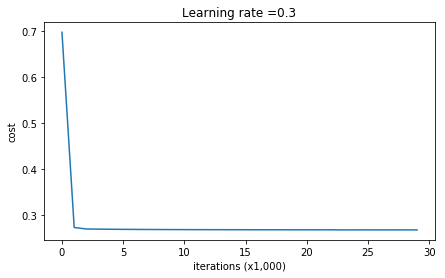

On the train set:
Accuracy: 0.938388625592
On the test set:
Accuracy: 0.93


In [43]:
parameters = model(train_X, train_Y, lambd = 0.7)
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Congrats, the test set accuracy increased to 93%. You have saved the French football team!

You are not overfitting the training data anymore. Let's plot the decision boundary.

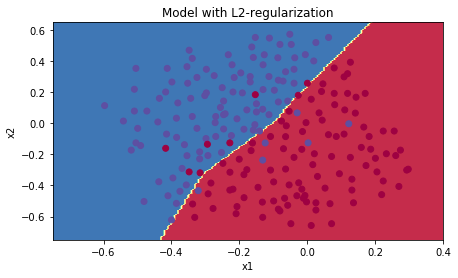

In [44]:
plt.title("Model with L2-regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Observations**:
- The value of $\lambda$ is a hyperparameter that you can tune using a dev set.
- L2 regularization makes your decision boundary smoother. If $\lambda$ is too large, it is also possible to "oversmooth", resulting in a model with high bias.

**What is L2-regularization actually doing?**:

L2-regularization relies on the assumption that a model with small weights is simpler than a model with large weights. Thus, by penalizing the square values of the weights in the cost function you drive all the weights to smaller values. It becomes too costly for the cost to have large weights! This leads to a smoother model in which the output changes more slowly as the input changes. 

<font color='blue'>
**What you should remember** -- the implications of L2-regularization on:
- The cost computation:
    - A regularization term is added to the cost
- The backpropagation function:
    - There are extra terms in the gradients with respect to weight matrices
- Weights end up smaller ("weight decay"): 
    - Weights are pushed to smaller values.

## 3 - Dropout

Finally, **dropout** is a widely used regularization technique that is specific to deep learning. 
**It randomly shuts down some neurons in each iteration.** Watch these two videos to see what this means!

<!--
To understand drop-out, consider this conversation with a friend:
- Friend: "Why do you need all these neurons to train your network and classify images?". 
- You: "Because each neuron contains a weight and can learn specific features/details/shape of an image. The more neurons I have, the more featurse my model learns!"
- Friend: "I see, but are you sure that your neurons are learning different features and not all the same features?"
- You: "Good point... Neurons in the same layer actually don't talk to each other. It should be definitly possible that they learn the same image features/shapes/forms/details... which would be redundant. There should be a solution."
!--> 


<center>
<video width="620" height="440" src="images/dropout1_kiank.mp4" type="video/mp4" controls>
</video>
</center>
<br>
<caption><center> <u> Figure 2 </u>: Drop-out on the second hidden layer. <br> At each iteration, you shut down (= set to zero) each neuron of a layer with probability $1 - keep\_prob$ or keep it with probability $keep\_prob$ (50% here). The dropped neurons don't contribute to the training in both the forward and backward propagations of the iteration. </center></caption>

<center>
<video width="620" height="440" src="images/dropout2_kiank.mp4" type="video/mp4" controls>
</video>
</center>

<caption><center> <u> Figure 3 </u>: Drop-out on the first and third hidden layers. <br> $1^{st}$ layer: we shut down on average 40% of the neurons.  $3^{rd}$ layer: we shut down on average 20% of the neurons. </center></caption>


When you shut some neurons down, you actually modify your model. The idea behind drop-out is that at each iteration, you train a different model that uses only a subset of your neurons. With dropout, your neurons thus become less sensitive to the activation of one other specific neuron, because that other neuron might be shut down at any time. 

### 3.1 - Forward propagation with dropout

**Exercise**: Implement the forward propagation with dropout. You are using a 3 layer neural network, and will add dropout to the first and second hidden layers. We will not apply dropout to the input layer or output layer. 

**Instructions**:
You would like to shut down some neurons in the first and second layers. To do that, you are going to carry out 4 Steps:
1. In lecture, we dicussed creating a variable $d^{[1]}$ with the same shape as $a^{[1]}$ using `np.random.rand()` to randomly get numbers between 0 and 1. Here, you will use a vectorized implementation, so create a random matrix $D^{[1]} = [d^{[1](1)} d^{[1](2)} ... d^{[1](m)}] $ of the same dimension as $A^{[1]}$.
2. Set each entry of $D^{[1]}$ to be 1 with probability (`keep_prob`), and 0 otherwise.

**Hint:** Let's say that keep_prob = 0.8, which means that we want to keep about 80% of the neurons and drop out about 20% of them.  We want to generate a vector that has 1's and 0's, where about 80% of them are 1 and about 20% are 0.
This python statement:  
`X = (X < keep_prob).astype(int)`  

is conceptually the same as this if-else statement (for the simple case of a one-dimensional array) :

```
for i,v in enumerate(x):
    if v < keep_prob:
        x[i] = 1
    else: # v >= keep_prob
        x[i] = 0
```
Note that the `X = (X < keep_prob).astype(int)` works with multi-dimensional arrays, and the resulting output preserves the dimensions of the input array.

Also note that without using `.astype(int)`, the result is an array of booleans `True` and `False`, which Python automatically converts to 1 and 0 if we multiply it with numbers.  (However, it's better practice to convert data into the data type that we intend, so try using `.astype(int)`.)

3. Set $A^{[1]}$ to $A^{[1]} * D^{[1]}$. (You are shutting down some neurons). You can think of $D^{[1]}$ as a mask, so that when it is multiplied with another matrix, it shuts down some of the values.
4. Divide $A^{[1]}$ by `keep_prob`. By doing this you are assuring that the result of the cost will still have the same expected value as without drop-out. (This technique is also called inverted dropout.)

In [61]:
# GRADED FUNCTION: forward_propagation_with_dropout

def forward_propagation_with_dropout(X, parameters, keep_prob = 0.5):
    """
    Implements the forward propagation: LINEAR -> RELU + DROPOUT -> LINEAR -> RELU + DROPOUT -> LINEAR -> SIGMOID.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    W1 -- weight matrix of shape (20, 2)
                    b1 -- bias vector of shape (20, 1)
                    W2 -- weight matrix of shape (3, 20)
                    b2 -- bias vector of shape (3, 1)
                    W3 -- weight matrix of shape (1, 3)
                    b3 -- bias vector of shape (1, 1)
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    A3 -- last activation value, output of the forward propagation, of shape (1,1)
    cache -- tuple, information stored for computing the backward propagation
    """
    
    np.random.seed(1)
    
    # retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    # LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    print(A1.shape)
    ### START CODE HERE ### (approx. 4 lines)         # Steps 1-4 below correspond to the Steps 1-4 described above. 
    D1 = np.random.rand(A1.shape[0],A1.shape[1])                                         # Step 1: initialize matrix D1 = np.random.rand(..., ...)
    D1 = (D1< keep_prob).astype(int)                                         # Step 2: convert entries of D1 to 0 or 1 (using keep_prob as the threshold)
    A1 = A1*D1                                         # Step 3: shut down some neurons of A1
    A1 = A1/keep_prob                                         # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    ### START CODE HERE ### (approx. 4 lines)
    D2 = np.random.rand(A2.shape[0],A2.shape[1])                                         # Step 1: initialize matrix D2 = np.random.rand(..., ...)
    D2 = (D2 < keep_prob).astype(int)                                         # Step 2: convert entries of D2 to 0 or 1 (using keep_prob as the threshold)
    A2 = A2*D2                                         # Step 3: shut down some neurons of A2
    A2 = A2/keep_prob                                         # Step 4: scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [62]:
X_assess, parameters = forward_propagation_with_dropout_test_case()

A3, cache = forward_propagation_with_dropout(X_assess, parameters, keep_prob = 0.7)
print ("A3 = " + str(A3))

(2, 5)
A3 = [[ 0.36974721  0.00305176  0.04565099  0.49683389  0.36974721]]


**Expected Output**: 

<table> 
    <tr>
    <td>
    **A3**
    </td>
        <td>
    [[ 0.36974721  0.00305176  0.04565099  0.49683389  0.36974721]]
    </td>
    
    </tr>

</table> 

### 3.2 - Backward propagation with dropout

**Exercise**: Implement the backward propagation with dropout. As before, you are training a 3 layer network. Add dropout to the first and second hidden layers, using the masks $D^{[1]}$ and $D^{[2]}$ stored in the cache. 

**Instruction**:
Backpropagation with dropout is actually quite easy. You will have to carry out 2 Steps:
1. You had previously shut down some neurons during forward propagation, by applying a mask $D^{[1]}$ to `A1`. In backpropagation, you will have to shut down the same neurons, by reapplying the same mask $D^{[1]}$ to `dA1`. 
2. During forward propagation, you had divided `A1` by `keep_prob`. In backpropagation, you'll therefore have to divide `dA1` by `keep_prob` again (the calculus interpretation is that if $A^{[1]}$ is scaled by `keep_prob`, then its derivative $dA^{[1]}$ is also scaled by the same `keep_prob`).


In [72]:
# GRADED FUNCTION: backward_propagation_with_dropout

def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.
    
    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA2 = dA2*D2             # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2/keep_prob             # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA1 = dA1*D1              # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1/keep_prob              # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients

In [73]:
X_assess, Y_assess, cache = backward_propagation_with_dropout_test_case()

gradients = backward_propagation_with_dropout(X_assess, Y_assess, cache, keep_prob = 0.8)

print ("dA1 = \n" + str(gradients["dA1"]))
print ("dA2 = \n" + str(gradients["dA2"]))

dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]


**Expected Output**: 

```
dA1 = 
[[ 0.36544439  0.         -0.00188233  0.         -0.17408748]
 [ 0.65515713  0.         -0.00337459  0.         -0.        ]]
dA2 = 
[[ 0.58180856  0.         -0.00299679  0.         -0.27715731]
 [ 0.          0.53159854 -0.          0.53159854 -0.34089673]
 [ 0.          0.         -0.00292733  0.         -0.        ]]
```

Let's now run the model with dropout (`keep_prob = 0.86`). It means at every iteration you shut down each neurons of layer 1 and 2 with 14% probability. The function `model()` will now call:
- `forward_propagation_with_dropout` instead of `forward_propagation`.
- `backward_propagation_with_dropout` instead of `backward_propagation`.

(20, 211)
Cost after iteration 0: 0.6543912405149825
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 21

(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


/home/jovyan/work/week5/Regularization/reg_utils.py:236: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
/home/jovyan/work/week5/Regularization/reg_utils.py:236: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)



(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)

(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)
(20, 211)


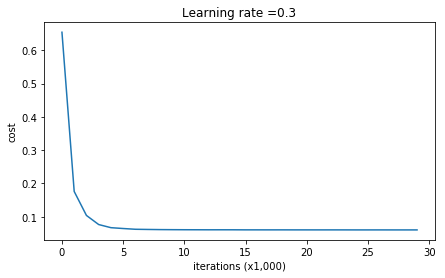

On the train set:
Accuracy: 0.928909952607
On the test set:
Accuracy: 0.95


In [74]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

Dropout works great! The test accuracy has increased again (to 95%)! Your model is not overfitting the training set and does a great job on the test set. The French football team will be forever grateful to you! 

Run the code below to plot the decision boundary.

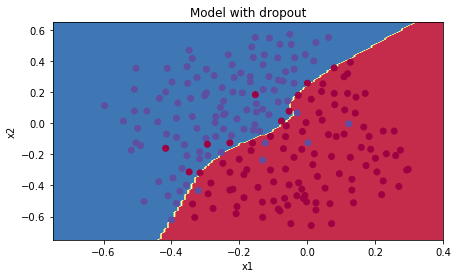

In [75]:
plt.title("Model with dropout")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

**Note**:
- A **common mistake** when using dropout is to use it both in training and testing. You should use dropout (randomly eliminate nodes) only in training. 
- Deep learning frameworks like [tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/dropout), [PaddlePaddle](http://doc.paddlepaddle.org/release_doc/0.9.0/doc/ui/api/trainer_config_helpers/attrs.html), [keras](https://keras.io/layers/core/#dropout) or [caffe](http://caffe.berkeleyvision.org/tutorial/layers/dropout.html) come with a dropout layer implementation. Don't stress - you will soon learn some of these frameworks.

<font color='blue'>
**What you should remember about dropout:**
- Dropout is a regularization technique.
- You only use dropout during training. Don't use dropout (randomly eliminate nodes) during test time.
- Apply dropout both during forward and backward propagation.
- During training time, divide each dropout layer by keep_prob to keep the same expected value for the activations. For example, if keep_prob is 0.5, then we will on average shut down half the nodes, so the output will be scaled by 0.5 since only the remaining half are contributing to the solution. Dividing by 0.5 is equivalent to multiplying by 2. Hence, the output now has the same expected value. You can check that this works even when keep_prob is other values than 0.5.  

## 4 - Conclusions

**Here are the results of our three models**: 

<table> 
    <tr>
        <td>
        **model**
        </td>
        <td>
        **train accuracy**
        </td>
        <td>
        **test accuracy**
        </td>

    </tr>
        <td>
        3-layer NN without regularization
        </td>
        <td>
        95%
        </td>
        <td>
        91.5%
        </td>
    <tr>
        <td>
        3-layer NN with L2-regularization
        </td>
        <td>
        94%
        </td>
        <td>
        93%
        </td>
    </tr>
    <tr>
        <td>
        3-layer NN with dropout
        </td>
        <td>
        93%
        </td>
        <td>
        95%
        </td>
    </tr>
</table> 

Note that regularization hurts training set performance! This is because it limits the ability of the network to overfit to the training set. But since it ultimately gives better test accuracy, it is helping your system. 

Congratulations for finishing this assignment! And also for revolutionizing French football. :-) 

<font color='blue'>
**What we want you to remember from this notebook**:
- Regularization will help you reduce overfitting.
- Regularization will drive your weights to lower values.
- L2 regularization and Dropout are two very effective regularization techniques.